In [1]:
#%% env: tbpt

from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
# from torchvision import datasets, transforms
from torch.autograd import variable
from itertools import chain
from sklearn import metrics as met
import pickle
# from icecream import ic
# import shap

import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from importlib import reload
# import util
# import model_torch_simple
# from torchmetrics import Accuracy
from tqdm import tqdm   
import argparse
# from icecream import ic
import numpy as np
from PIL import Image
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import xgboost as xgb

import numpy as np
import pandas as pd
# from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#%%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

seed = 42
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_train_gene.csv', delimiter = ',')
# train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_train_hml.csv')
# train_target = train_target[['EMB_MIC']]
# # don't touch test data, split out validation data from training data during training
# # test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_EMB/aa_data_test_pca4k.csv', delimiter = ',')
# test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_test_gene.csv', delimiter = ',')
# test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_test_hml.csv')
# test_target = test_target[['EMB_MIC']]

# all_data = np.concatenate((train_data, test_data), axis=0)
# all_target = pd.concat((train_target, test_target), axis=0)

# train_data, test_data, train_target, test_target = train_test_split(all_data, all_target, test_size=0.2, random_state=42, stratify=all_target)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
      in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts 

### data import

<Figure size 720x432 with 0 Axes>

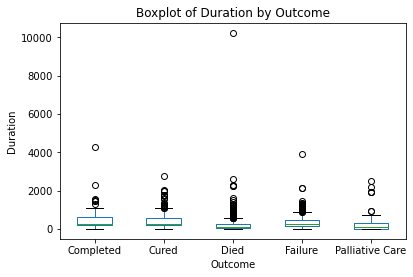

/tmp/ipykernel_22825/1006823845.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
/tmp/ipykernel_22825/1006823845.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinical_lung['outcome'].replace({'Cured':

In [3]:
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# clinical_lung.drop(columns=['None',
# 'Not Reported',
# 'Not reported-Comorbidity',
# 'Not specified',
# 'Others',
# 'Not Reported.1',
# 'unknown',
# 'Not Reported.4',
# 'Not done',
# 'Not Reported.2',
# 'Not Reported.3',
# 'Unknown result'], inplace=True)

country_mapping = {
    'China': 1,        # High medical capacity, large infrastructure, advanced technology
    'India': 2,        # Large infrastructure, but strained capacity due to population
    'South Africa': 3, # Developed healthcare, but regional disparities
    'Romania': 4,      # Developing EU healthcare standards
    'Ukraine': 5,      # Moderate capacity but strained due to recent conflicts
    'Belarus': 6,      # Moderate capacity, state-funded healthcare
    'Kazakhstan': 7,   # Developing healthcare system
    'Azerbaijan': 8,   # Developing healthcare system
    'Georgia': 9,      # Smaller healthcare capacity, improving
    'Moldova': 10,     # Limited resources, developing healthcare
    'Kyrgyzstan': 11,  # Limited resources, developing healthcare
    'Nigeria': 12,     # Limited healthcare capacity, large population challenges
    'Senegal': 13      # Developing healthcare system with limited resources
}


# clinical_lung
plt.figure(figsize=(10, 6))
clinical_lung.boxplot(column='period_span', by='outcome', grid=False)
plt.title('Boxplot of Duration by Outcome')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Outcome')
plt.ylabel('Duration')
plt.show()

# Apply the mapping to the 'country' column
clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
clinical_lung = clinical_lung.drop(columns=['country'])

clinical_lung['education'] = clinical_lung['education'] - 1
clinical_lung['education'] = clinical_lung['education'].replace({-1: np.nan})

clinical_lung = clinical_lung[clinical_lung['outcome']!= 'Completed']
clinical_lung = clinical_lung.drop_duplicates()

clinical_lung['outcome'].replace({'Cured': 1, 'Completed':0,'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
# clinical_lung['outcome'].replace({'Cured': 3, 'Completed':0,'Died': 0, 'Failure': 1, 'Palliative Care': 2}, inplace=True)
clinical_lung_features = clinical_lung.drop(columns=['outcome', 'period_span.1'])
clinical_lung_target = clinical_lung[['outcome']]

clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'].replace('0', np.nan)
clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'] - 1

### country variable related prediction

In [4]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_xgboost_classifier(X_train, X_test, y_train, y_test, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates XGBoost using Stratified K-Fold cross-validation.
    Handles missing values natively.

    Returns:
    - model (XGBClassifier): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge input data
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        model = XGBClassifier(
            n_estimators=500,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=1.0,
            scale_pos_weight=None,  # set manually if needed
            use_label_encoder=False,
            eval_metric='logloss',
            tree_method='hist',  # faster on large data
            random_state=42,
            n_jobs=-1
        )

        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]

        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_X_test = X_te
            last_y_test = y_te
            last_y_pred = y_pred

    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    # print(f"\n{n_splits}-Fold Cross-Validation (XGBoost):")
    # for k, v in metrics.items():
    #     print(f"{k}: {v['mean±sd']} {v['range']}")

    # print("\nPer-fold AUC-ROC values:")
    # for i, auc in enumerate(aucs, 1):
    #     print(f"  Fold {i}: {auc:.4f}")

    # if plot_last_fold:
    #     cm = confusion_matrix(last_y_test, last_y_pred)
    #     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
    #     disp.plot(cmap=plt.cm.Blues)
    #     plt.title('Confusion Matrix (Last Fold)')
    #     plt.show()

    #     # Optional: plot feature importance
    #     plt.figure(figsize=(20, 10))
    #     plot_importance(last_model, max_num_features=20)
    #     plt.title("Top 20 Feature Importances (Last Fold)")
    #     plt.show()

    return last_model, metrics


#### adding in country as a variable - full model

In [5]:
# Fit and resample the training data

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# # Convert the result back to a DataFrame

X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)


# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:35:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:35:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:35:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/

{'Testing Accuracy': {'mean±sd': '0.9332 ± 0.0056', 'range': '[0.9271–0.9413]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9736 ± 0.0024', 'range': '[0.9697–0.9762]'}, 'Specificity': {'mean±sd': '0.8097 ± 0.0207', 'range': '[0.7820–0.8350]'}, 'AUC-ROC': {'mean±sd': '0.9606 ± 0.0048', 'range': '[0.9540–0.9660]'}, 'F1-Score': {'mean±sd': '0.9564 ± 0.0035', 'range': '[0.9525–0.9616]'}}


#### leave one out country prediction

In [9]:
clinical_lung['country'].value_counts()# Re-import everything needed for this session
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score
)
from sklearn.preprocessing import StandardScaler

# Simulate clinical_lung_features and target (replace with real data in practice)
np.random.seed(42)
country_counts = clinical_lung['country'].value_counts()
valid_countries = country_counts[country_counts > 100].index.tolist()

all_metrics = {
    "Left-out Country": [],
    "Sample count (%)": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Specificity": [],
    "AUC-ROC": [],
    "F1-Score": []
}

for x in valid_countries:
    print(f"Evaluating for country: {x}")
    X_train = clinical_lung_features[clinical_lung_features['country'] != x]
    y_train = clinical_lung_target[clinical_lung_features['country'] != x]
    X_test = clinical_lung_features[clinical_lung_features['country'] == x]
    y_test = clinical_lung_target[clinical_lung_features['country'] == x]
    
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)
    X_train.drop(columns=['country'], inplace=True)
    X_test.drop(columns=['country'], inplace=True)
        # Fit and resample the training data
    # X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    X_train_resampled, y_train_resampled = X_train, y_train

    # evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
    # evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
    # evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
    # model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

    # for data with none columns
    model, metrics = evaluate_xgboost_classifier(
        X_train_resampled, X_test, y_train_resampled, y_test,
    )
    country = [key for key, val in country_mapping.items() if val == x][0]

        # Store mean metrics for this country
    all_metrics["Left-out Country"].append(country)
    all_metrics["AUC-ROC"].append(metrics['AUC-ROC']['mean±sd'])
    all_metrics["Accuracy"].append(metrics['Testing Accuracy']['mean±sd'])
    all_metrics["Sensitivity"].append(metrics['Sensitivity (Recall)']['mean±sd'])
    all_metrics["Specificity"].append(metrics['Specificity']['mean±sd'])
    all_metrics["F1-Score"].append(metrics['F1-Score']['mean±sd'])
    all_metrics["Sample count (%)"].append(f"{len(y_test)} ({np.round(len(y_test)/len(clinical_lung_target)*100, 0)}%)")

# {'Testing Accuracy': {'mean±sd': '0.9343 ± 0.0078', 'range': '[0.9197–0.9419]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9761 ± 0.0058', 'range': '[0.9680–0.9861]'}, 'Specificity': {'mean±sd': '0.8067 ± 0.0190', 'range': '[0.7725–0.8296]'}, 'AUC-ROC': {'mean±sd': '0.9621 ± 0.0047', 'range': '[0.9533–0.9675]'}, 'F1-Score': {'mean±sd': '0.9572 ± 0.0051', 'range': '[0.9478–0.9624]'}}

# Convert to DataFrame for easy viewing
country_eval_df = pd.DataFrame(all_metrics)


KeyError: 'country'

In [ ]:
country_eval_df.T

,0,1,2,3,4,5,6,7
Left-out Country,Ukraine,Georgia,Moldova,Belarus,Romania,Nigeria,Kazakhstan,Azerbaijan
Sample count (%),2479 (31.0%),2413 (30.0%),1310 (16.0%),987 (12.0%),288 (4.0%),195 (2.0%),174 (2.0%),151 (2.0%)
Accuracy,0.9328 ± 0.0085,0.9309 ± 0.0050,0.9335 ± 0.0047,0.9329 ± 0.0020,0.9329 ± 0.0072,0.9327 ± 0.0041,0.9335 ± 0.0040,0.9333 ± 0.0034
Sensitivity,0.9738 ± 0.0048,0.9715 ± 0.0035,0.9744 ± 0.0029,0.9751 ± 0.0020,0.9741 ± 0.0062,0.9726 ± 0.0046,0.9734 ± 0.0043,0.9734 ± 0.0039
Specificity,0.8077 ± 0.0265,0.8072 ± 0.0153,0.8087 ± 0.0176,0.8042 ± 0.0072,0.8072 ± 0.0207,0.8107 ± 0.0186,0.8117 ± 0.0097,0.8107 ± 0.0046
AUC-ROC,0.9618 ± 0.0054,0.9616 ± 0.0034,0.9590 ± 0.0103,0.9604 ± 0.0032,0.9619 ± 0.0049,0.9617 ± 0.0045,0.9602 ± 0.0038,0.9612 ± 0.0035
F1-Score,0.9562 ± 0.0055,0.9549 ± 0.0032,0.9567 ± 0.0030,0.9563 ± 0.0013,0.9563 ± 0.0047,0.9561 ± 0.0026,0.9566 ± 0.0026,0.9565 ± 0.0023


### feature levels

In [5]:
feature_groups = {
    'main_lineage': ['La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4'],
    'culture': ['1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture'],
    'regimen_drug':['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid'],
    'treatment_status': ['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study',
       'Treatment ineffective due to additional resistance'],
    'social_risk_factors':  ['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees'],
    'comobidity': [' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
    'diagnosis_code':['A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9']
}

# feature_levels = {
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Social_risk_factors','age_of_onset','bmi'],
#    'post-diagnosis': ['type_of_resistance','number_of_daily_contacts','case_definition','diagnosis_code','comorbidity','culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'main_lineage'],
#    'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['regimen_drug','regimen_count','period_span','outcome','treatment status']
# }

## dummied features filled in
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' : ['hugenodules','largenodules','mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','outcome','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }

# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' : ['hugenodules','largenodules', 'mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral',
#                   'are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity',
#                   'infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists',
#                   'lowgroundglassdensityactivefreshnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }

### new feature levels with comorbidity and daily contacts added ot pre-diagnosis
# country removed
# feature_levels = {
#    'pre-diagnosis': ['education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts', 
#        '1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200', 
#        ' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' : ['hugenodules','largenodules', 'mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral',
#                   'are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity',
#                   'infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists',
#                   'lowgroundglassdensityactivefreshnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }

# remove 'totalcavernum'
feature_levels = {
   'pre-diagnosis': ['education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts', 
       '1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200', 
       ' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
   'post-diagnosis': ['type_of_resistance','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7', #'case_definition',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
   'post-scan' : ['hugenodules','largenodules', 'mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral',
                  'are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity',
                  'infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists',
                  'lowgroundglassdensityactivefreshnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization'],
   'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study',
       'Treatment ineffective due to additional resistance']
}
# feature_levels = {
#    'pre-diagnosis': ['education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts', 
#        '1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200', 
#        ' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' :    ['timika_score',
#     'overall_percent_of_abnormal_volume',
#     'collapse',
#     'pleural_effusion_percent_of_hemithorax_involved',
#     'largecavities',
#     'smallcavities',
#     'infiltrate_lowgroundglassdensity',
#     'infiltrate_highdensity',
#     'lung_localization'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }
cols = list(chain.from_iterable(
    v if isinstance(v, list) else [v] 
    for v in feature_levels.values()
))
clinical_lung_features  = clinical_lung_features[cols]

#### feature correlations

/TBpt/Analysis/cache/multiclass_prediction.ipynb

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

def summarize_categorical_difference(df, feature_col, outcome_col):
    # Build contingency table: rows = feature levels, columns = outcome (0, 1)
    ct = pd.crosstab(df[feature_col], df[outcome_col])

    # Ensure both outcomes (0, 1) are in columns
    for val in [0, 1]:
        if val not in ct.columns:
            ct[val] = 0
    ct = ct[[1, 0]]  # [Success, Failure]

    # Total N and success rate
    ct['N'] = ct.sum(axis=1)
    ct['SuccessRate'] = ct[1] / ct['N'] * 100

    # Difference from reference (first level)
    ref_rate = ct['SuccessRate'].iloc[0]
    ct['Difference'] = ct['SuccessRate'] - ref_rate

    # Format columns
    ct['Success (n, %)'] = ct[1].astype(str) + ' (' + ct['SuccessRate'].round(1).astype(str) + '%)'
    ct['Failure (n, %)'] = ct[0].astype(str) + ' (' + (100 - ct['SuccessRate']).round(1).astype(str) + '%)'
    ct['Difference'] = ct['Difference'].round(1).astype(str) + '%'

    # Add chi-squared p-value
    chi2, p, _, _ = chi2_contingency(ct[[1, 0]])
    ct['P'] = ''
    ct.iloc[0, ct.columns.get_loc('P')] = f"{p:.2e}"

    # Output
    return ct[['N', 'Success (n, %)', 'Failure (n, %)', 'Difference', 'P']].reset_index().rename(columns={feature_col: 'Level'})


In [9]:
summarize_categorical_difference(clinical_lung, 'gender', 'outcome')

outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,0,5996,4350 (72.5%),1646 (27.5%),0.0%,1.44e-22
1,1,2098,1747 (83.3%),351 (16.7%),10.7%,


In [227]:
summarize_categorical_difference(clinical_lung, 'education', 'outcome')

outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,0.0,1408,789 (56.0%),619 (44.0%),0.0%,1.60e-41
1,1.0,2070,1424 (68.8%),646 (31.2%),12.8%,
2,2.0,1290,984 (76.3%),306 (23.7%),20.2%,
3,3.0,343,299 (87.2%),44 (12.8%),31.1%,


In [ ]:
summarize_categorical_difference(clinical_lung, 'employment', 'outcome')

outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,0.0,4780,3520 (73.6%),1260 (26.4%),0.0%,9.52e-74
1,1.0,32,27 (84.4%),5 (15.6%),10.7%,
2,2.0,85,54 (63.5%),31 (36.5%),-10.1%,
3,3.0,1600,1421 (88.8%),179 (11.2%),15.2%,
4,4.0,547,367 (67.1%),180 (32.9%),-6.5%,
5,5.0,28,22 (78.6%),6 (21.4%),4.9%,
6,6.0,130,122 (93.8%),8 (6.2%),20.2%,
7,7.0,523,275 (52.6%),248 (47.4%),-21.1%,


In [ ]:
summarize_categorical_difference(clinical_lung, 'HIV', 'outcome')

outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,0,7302,5660 (77.5%),1642 (22.5%),0.0%,2.35e-43
1,1,792,437 (55.2%),355 (44.8%),-22.3%,


In [ ]:
clinical_lung['type_of_resistance']

1        0
2        0
3        0
4        0
5        0
        ..
10143    0
10145    5
10147    3
10148    3
10149    5
Name: type_of_resistance, Length: 8094, dtype: int64

In [ ]:
summarize_categorical_difference(clinical_lung, 'type_of_resistance', 'outcome')

outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,0,2727,2388 (87.6%),339 (12.4%),0.0%,1.75e-107
1,1,586,492 (84.0%),94 (16.0%),-3.6%,
2,2,193,157 (81.3%),36 (18.7%),-6.2%,
3,3,3285,2306 (70.2%),979 (29.8%),-17.4%,
4,4,373,212 (56.8%),161 (43.2%),-30.7%,
5,5,930,542 (58.3%),388 (41.7%),-29.3%,


In [ ]:
# Define bins and labels
bins = [-float('inf'), 20, 40, 60, 80, float('inf')]
labels = ['<20', '20-40', '40-60', '60-80', '60+']

# Categorize age
clinical_lung['age_of_onset_group'] = pd.cut(clinical_lung['age_of_onset'], bins=bins, labels=labels, right=False, ordered=True)

# Optionally: ordinal encode it
clinical_lung['age_of_onset_encoded'] = clinical_lung['age_of_onset_group'].cat.codes

summarize_categorical_difference(clinical_lung, 'age_of_onset_encoded', 'outcome')

outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,0,225,216 (96.0%),9 (4.0%),0.0%,4.65e-28
1,1,3252,2600 (80.0%),652 (20.0%),-16.0%,
2,2,3583,2546 (71.1%),1037 (28.9%),-24.9%,
3,3,936,665 (71.0%),271 (29.0%),-25.0%,
4,4,98,70 (71.4%),28 (28.6%),-24.6%,


In [14]:
import numpy as np
import pandas as pd

# Step 1: Bin BMI
def assign_bmi_group(bmi):
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 20:
        return '<20'
    elif bmi < 30:
        return '20-30'
    else:
        return '30+'

clinical_lung['bmi_group'] = clinical_lung['bmi'].apply(assign_bmi_group)

# Step 2: Keep only known BMI groups
known_bmi = clinical_lung[clinical_lung['bmi_group'] != 'Unknown'].copy()

# Step 3: Order the BMI groups
bmi_order = ['<20', '20-30', '30+']  # exclude 'Unknown'
known_bmi['bmi_group'] = pd.Categorical(known_bmi['bmi_group'], categories=bmi_order, ordered=True)

# Step 4: Encode ordinally if needed
known_bmi['bmi_encoded'] = known_bmi['bmi_group'].cat.codes

# Step 5: Run group-wise analysis
summarize_categorical_difference(known_bmi, 'bmi_group', 'outcome')


outcome,Level,N,"Success (n, %)","Failure (n, %)",Difference,P
0,<20,2592,1644 (63.4%),948 (36.6%),0.0%,3.46e-27
1,20-30,2937,2249 (76.6%),688 (23.4%),13.1%,
2,30+,90,75 (83.3%),15 (16.7%),19.9%,


In [15]:
clinical_lung[feature_levels['post-scan']].isna().sum()/ len(clinical_lung)

hugenodules                                        0.000000
largenodules                                       0.000000
mediumdensitystabalizedfibroticnodules             0.000000
collapse                                           0.000000
overall_percent_of_abnormal_volume                 0.000000
pleural_effusion_percent_of_hemithorax_involved    0.234495
ispleuraleffusionbilateral                         0.234618
are_mediastinal_lymphnodes_present                 0.234495
smallcavities                                      0.000000
mediumcavities                                     0.000000
largecavities                                      0.000000
isanylargecavitybelongtoamultisextantcavity        0.000000
canmultiplecavitiesbeseen                          0.000000
infiltrate_lowgroundglassdensity                   0.000000
infiltrate_mediumdensity                           0.000000
infiltrate_highdensity                             0.000000
smallnodules                            

In [16]:

to_drop = ['totalcavernum', 'isanynoncalcifiednoduleexist', 'smallnodules', 'lowgroundglassdensityactivefreshnodules']

In [17]:
to_drop

['totalcavernum',
 'isanynoncalcifiednoduleexist',
 'smallnodules',
 'lowgroundglassdensityactivefreshnodules']

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = clinical_lung[feature_levels['post-scan']].dropna()
X_scaled = StandardScaler().fit_transform(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))


                                            Feature       VIF
16                                     smallnodules  5.216310
2            mediumdensitystabalizedfibroticnodules  4.540861
22          lowgroundglassdensityactivefreshnodules  4.462673
19                     isanynoncalcifiednoduleexist  4.455229
17                                    mediumnodules  4.396247
24                                     timika_score  3.746242
21                          aremultiplenoduleexists  2.957531
20                       isanyclusterednoduleexists  2.644527
8                                     smallcavities  2.573767
11      isanylargecavitybelongtoamultisextantcavity  2.304253
12                        canmultiplecavitiesbeseen  2.234363
4                overall_percent_of_abnormal_volume  2.163351
18    isanycalcifiedorpartiallycalcifiednoduleexist  2.127169
9                                    mediumcavities  2.118245
23            highdensitycalcifiedtypicallysequella  1.927089
15      

In [19]:
feature_levels1 = {
   'pre-diagnosis': ['country','education','gender','employment','Social_risk_factors','age_of_onset','bmi','number_of_daily_contacts','comorbidity'],
   'post-diagnosis': ['type_of_resistance','case_definition','diagnosis_code','culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'main_lineage'],
   'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
   'Treatment-period' : ['regimen_drug','regimen_count','period_span','outcome','treatment status']
}


for k,v in feature_levels1.items():
    print(f"Feature group: {k}")
    print(f"Number of features: {len(v)}")

Feature group: pre-diagnosis
Number of features: 9
Feature group: post-diagnosis
Number of features: 9
Feature group: post-scan
Number of features: 28
Feature group: Treatment-period
Number of features: 5


In [20]:
feature_levels1 = {
   'Demographic': 'country, education,gender, employment,Social risk factors, age of onset, bmi, number of daily contacts, comorbidity',
   'Microbiological': 'type of resistance, case definition, diagnosis code, culture, genexpert test,bactec isoniazid,bactec rifampicin,bactec ethambutol, main lineage',
   'X-ray' : 'overall percent of abnormal volume, pleural effusion percent of hemithorax involved, ispleuraleffusionbilateral, other non tb abnormalities, are mediastinal lymphnodes present, Collapse, smallcavities, mediumcavities, largecavities, isanylargecavitybelongtoamultisextantcavity, canmultiplecavitiesbeseen, infiltrate lowgroundglassdensity, infiltrate mediumdensity, infiltrate highdensity, smallnodules, mediumnodules, Largenodules,Hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist, isanynoncalcifiednoduleexist, isanyclusterednoduleexists, aremultiplenoduleexists, lowgroundglassdensityactivefreshnodules, mediumdensitystabilizedfibroticnodules, highdensitycalcifiedtypicallysequella,timika score, lung localization, totalcavernum',
   'Treatment' : 'regimen drug, regimen count, period span, outcome, treatment status'
}

pd.DataFrame.from_dict(feature_levels1, orient='index', columns=['Features']).to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/feature_groups.csv')

<Figure size 1000x600 with 0 Axes>

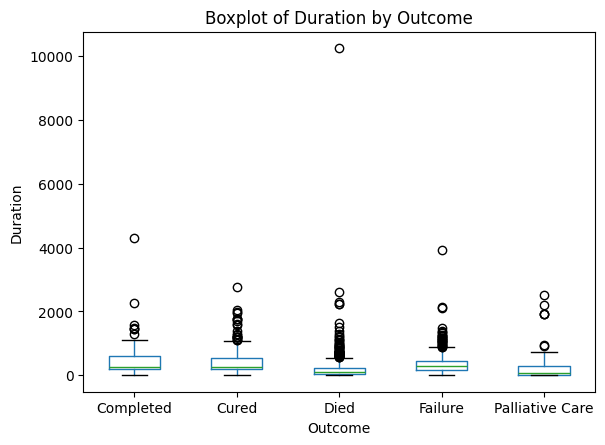

/tmp/ipykernel_108886/351698240.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
/tmp/ipykernel_108886/351698240.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinical_lung['outcome'].replace({'Cured':

In [142]:
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# clinical_lung.drop(columns=['None',
# 'Not Reported',
# 'Not reported-Comorbidity',
# 'Not specified',
# 'Others',
# 'Not Reported.1',
# 'unknown',
# 'Not Reported.4',
# 'Not done',
# 'Not Reported.2',
# 'Not Reported.3',
# 'Unknown result'], inplace=True)

country_mapping = {
    'China': 1,        # High medical capacity, large infrastructure, advanced technology
    'India': 2,        # Large infrastructure, but strained capacity due to population
    'South Africa': 3, # Developed healthcare, but regional disparities
    'Romania': 4,      # Developing EU healthcare standards
    'Ukraine': 5,      # Moderate capacity but strained due to recent conflicts
    'Belarus': 6,      # Moderate capacity, state-funded healthcare
    'Kazakhstan': 7,   # Developing healthcare system
    'Azerbaijan': 8,   # Developing healthcare system
    'Georgia': 9,      # Smaller healthcare capacity, improving
    'Moldova': 10,     # Limited resources, developing healthcare
    'Kyrgyzstan': 11,  # Limited resources, developing healthcare
    'Nigeria': 12,     # Limited healthcare capacity, large population challenges
    'Senegal': 13      # Developing healthcare system with limited resources
}


# clinical_lung
plt.figure(figsize=(10, 6))
clinical_lung.boxplot(column='period_span', by='outcome', grid=False)
plt.title('Boxplot of Duration by Outcome')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Outcome')
plt.ylabel('Duration')
plt.show()


# Apply the mapping to the 'country' column
clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
clinical_lung = clinical_lung.drop(columns=['country'])

clinical_lung['education'] = clinical_lung['education'] - 1
clinical_lung['education'] = clinical_lung['education'].replace({-1: np.nan})

clinical_lung = clinical_lung[clinical_lung['outcome']!= 'Completed']
clinical_lung = clinical_lung.drop_duplicates()

clinical_lung['outcome'].replace({'Cured': 1, 'Completed':0,'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
# clinical_lung['outcome'].replace({'Cured': 3, 'Completed':0,'Died': 0, 'Failure': 1, 'Palliative Care': 2}, inplace=True)
clinical_lung_features = clinical_lung.drop(columns=['outcome', 'period_span.1'])
clinical_lung_target = clinical_lung[['outcome']]

clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'].replace('0', np.nan)
clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'] - 1

### survival_analysis

/tmp/ipykernel_72139/109761502.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['outcome'] = clinical_lung['outcome'].replace({


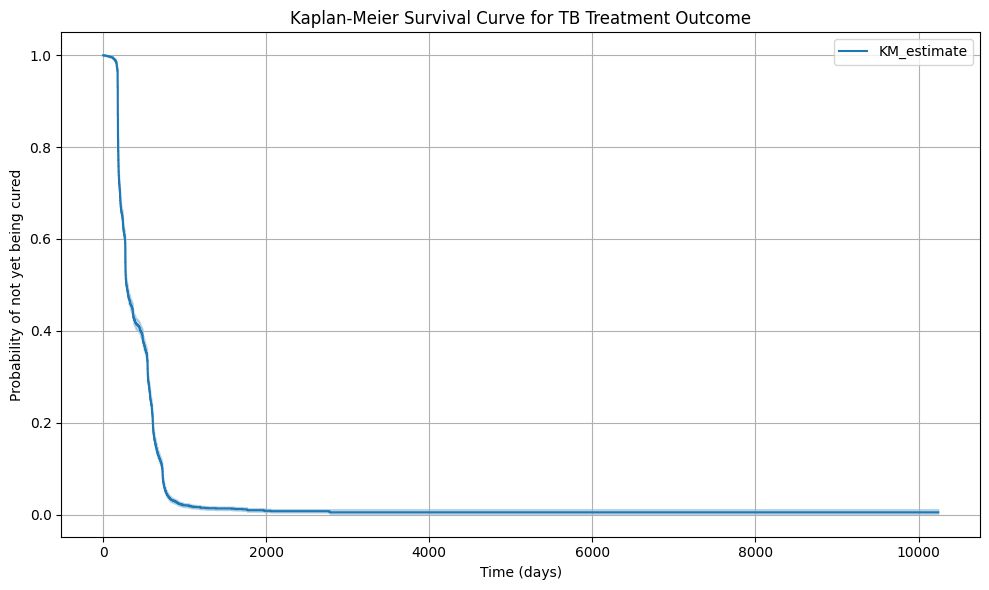

(np.float64(287.0),
        KM_estimate
 count   922.000000
 mean      0.423922
 std       0.342413
 min       0.005042
 25%       0.115698
 50%       0.396880
 75%       0.654281
 max       0.999750)

In [12]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the data
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# Clean outcome
clinical_lung = clinical_lung[clinical_lung['outcome'] != 'Completed']
clinical_lung = clinical_lung.drop_duplicates()
clinical_lung['outcome'] = clinical_lung['outcome'].replace({
    'Cured': 1,
    'Died': 0,
    'Failure': 0,
    'Palliative Care': 0
})

# Prepare survival data
# For demonstration, we'll use period_span as duration until outcome
# Rename for compatibility with lifelines
clinical_lung = clinical_lung.rename(columns={' ': 'period_span'})

# Drop rows with missing time or outcome
clinical_lung = clinical_lung.dropna(subset=['period_span', 'outcome'])

# Fit Kaplan-Meier curve
kmf = KaplanMeierFitter()
kmf.fit(durations=clinical_lung['period_span'], event_observed=clinical_lung['outcome'])

# Plot
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for TB Treatment Outcome')
plt.xlabel('Time (days)')
plt.ylabel('Probability of not yet being cured')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary stats for use in a paragraph
median_survival_time = kmf.median_survival_time_
summary_stats = kmf.survival_function_.describe()

median_survival_time, summary_stats


#### AFT

In [13]:
feature_df = clinical_lung.copy()
feature_df = feature_df.dropna(axis=1)
# Ensure correct survival columns
feature_df['period_span'] = pd.to_numeric(feature_df['period_span'], errors='coerce') / 100  # ✅ Rescale duration
feature_df = feature_df[feature_df['period_span'] < feature_df['period_span'].quantile(0.99)]
na_percentage = feature_df.isna().mean() * 100
print(na_percentage)


overall_percent_of_abnormal_volume    0.0
collapse                              0.0
smallcavities                         0.0
mediumcavities                        0.0
largecavities                         0.0
                                     ... 
lineage2                              0.0
lineage2-lineage4                     0.0
lineage3                              0.0
lineage3-lineage4                     0.0
lineage4                              0.0
Length: 151, dtype: float64


In [14]:
na_percentage.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/na_percentage.csv')

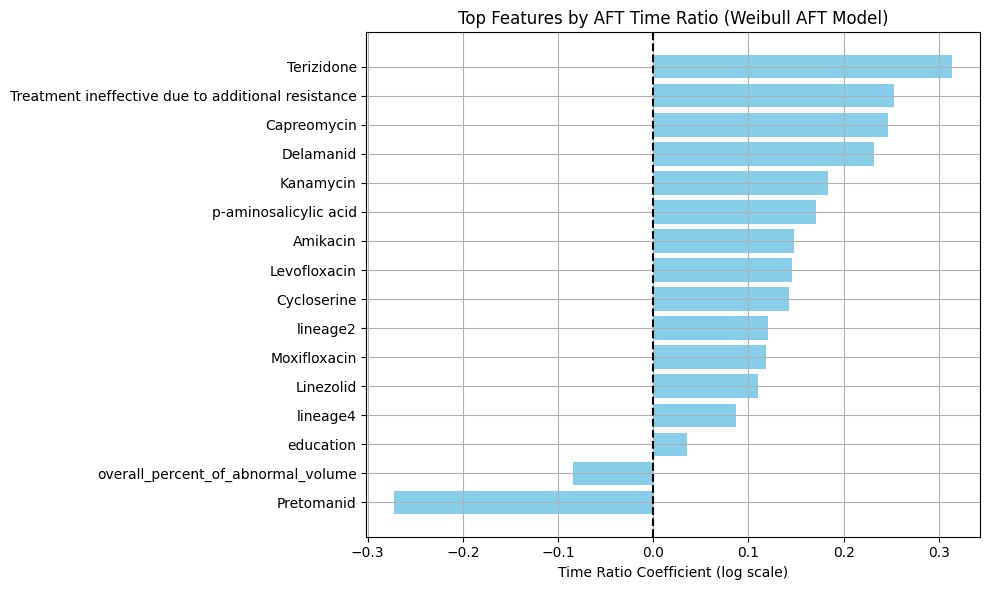

In [ ]:
import pandas as pd
import numpy as np
from lifelines import WeibullAFTFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Start from clinical_lung
feature_df = clinical_lung.copy()
feature_df = feature_df.dropna(axis=1)

# Ensure correct survival columns
feature_df['period_span'] = pd.to_numeric(feature_df['period_span'], errors='coerce') / 100  # ✅ Rescale duration
feature_df = feature_df[feature_df['period_span'] < feature_df['period_span'].quantile(0.99)]

_ = ['Treatment_ended',
'Pretomanid',
'Negative',
'Clofazimine',
'Patient_stopped_treatment',
'Bedaquiline',
'Treatment_ineffective_due_to_additional_resistance',
'Adverse_event',
'Continuation_of_treatment',
'HIV',
'p-aminosalicylic_acid',
'gender',
'Capreomycin',
'pleural_effusion_percent_of_hemithorax_involved',
'Ethionamide',
'Patient_alcohol_abuse',
'Amikacin',
'Amoxicillin-clavulanate',
'100_to_200',
'lineage2',
'More_than_200',
'Delamanid',
'type_of_resistance',
'regimen_count',
'mediumcavities',
'collapse_in_lung',
'case_definition',
'non-calcified_nodule',
'infiltrate_low_ground_glass_density',
'multiple_nodule',
'number_of_daily_contacts',
'BMI',
'age_of_onset']

feature_df['event'] = feature_df['outcome']
feature_df = feature_df[feature_df['event']==1]

# feature_df = feature_df.drop(columns=['country'])
# ✅ Center large numeric variables
for col in ['age_of_onset', 'bmi', 'timika_score']:
    if col in feature_df.columns and pd.api.types.is_numeric_dtype(feature_df[col]):
        feature_df[col] = feature_df[col] - feature_df[col].mean()

    # ✅ Remove perfectly constant columns
constant_cols = [col for col in feature_df.columns if col != 'event' and feature_df[col].nunique(dropna=False) == 1]
feature_df.drop(columns=constant_cols, inplace=True)
feature_df.drop(columns=['country'], inplace=True)

# ✅ Multicollinearity filtering: VIF > 10
X = feature_df.drop(columns=['period_span', 'event', 'outcome'], errors='ignore')
X_numeric = X.select_dtypes(include=[np.number]).dropna()
vif_data = pd.DataFrame()
vif_data['feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
high_vif_cols = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()
high_vif_cols = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
feature_df.drop(columns=high_vif_cols, inplace=True)

feature_df['period_span'] = feature_df['period_span'] + 0.01
# ✅ Drop any remaining missing values
# feature_df = feature_df.fillna()
imputer = SimpleImputer(strategy='most_frequent')
feature_df[:] = imputer.fit_transform(feature_df)
# ✅ Fit the Weibull AFT model with a penalizer
aft = WeibullAFTFitter(penalizer=0.01)
aft._scipy_fit_method = "SLSQP"
aft.fit(feature_df, duration_col='period_span', event_col='event')

# ✅ Extract significant coefficients
results = []
for feature in feature_df.drop(columns=['period_span', 'event', 'outcome'], errors='ignore').columns:
    try:
        matching_index = [i for i in aft.summary.index if feature in i]
        if matching_index:
            p_value = aft.summary.loc[matching_index[0], 'p']
            coef = aft.summary.loc[matching_index[0], 'coef']
            results.append((feature, coef, p_value))
    except Exception as e:
        print(f"Skipped {feature} due to: {e}")
        continue

# ✅ Create result table and plot top features
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results, columns=['Feature', 'Coef', 'p']).sort_values(by='p')
results_df = results_df[
    ~results_df['Feature'].isin([
        'Not_Reported-regimen_drug', 
        'Not_Reported-treatment_status', 
        'Not specified', 
        'Continuation of treatment'
    ])
]
top_results = results_df.head(16).sort_values(by='Coef')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_results['Feature'], top_results['Coef'], color='skyblue')
plt.axvline(x=0, color='black', linestyle='--')

# Increase font sizes
plt.xlabel('Time Ratio Coefficient (log scale)', fontsize=14, labelpad=10)
plt.ylabel('Feature', fontsize=14, labelpad=10)
plt.title('Top Features by AFT Time Ratio (Weibull AFT Model)', fontsize=16, weight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


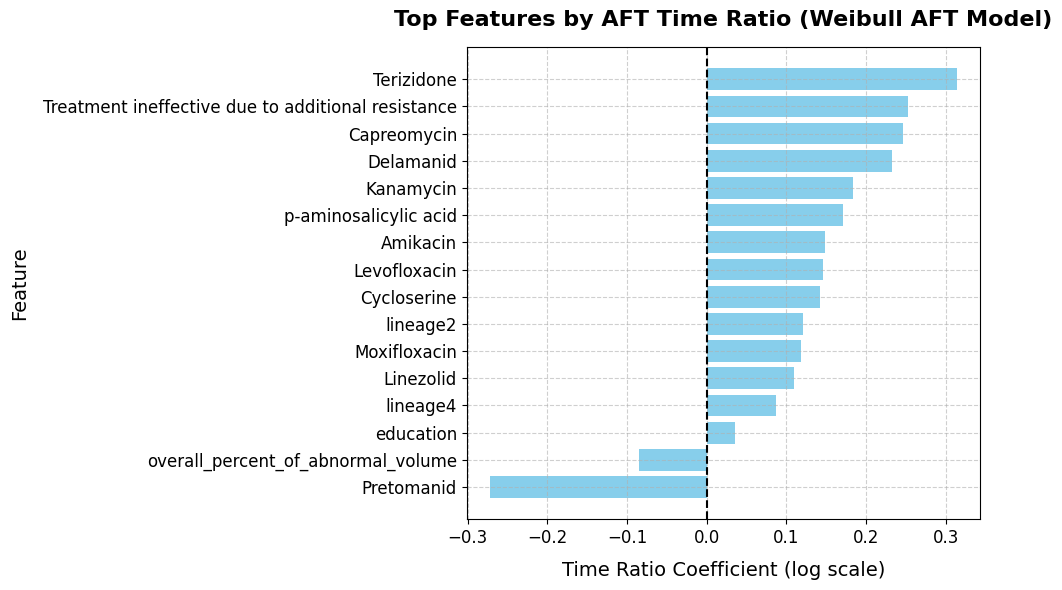

In [17]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results, columns=['Feature', 'Coef', 'p']).sort_values(by='p')
results_df = results_df[
    ~results_df['Feature'].isin([
        'Not_Reported-regimen_drug', 
        'Not_Reported-treatment_status', 
        'Not specified', 
        'Continuation of treatment'
    ])
]
top_results = results_df.head(16).sort_values(by='Coef')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_results['Feature'], top_results['Coef'], color='skyblue')
plt.axvline(x=0, color='black', linestyle='--')

# Increase font sizes
plt.xlabel('Time Ratio Coefficient (log scale)', fontsize=14, labelpad=10)
plt.ylabel('Feature', fontsize=14, labelpad=10)
plt.title('Top Features by AFT Time Ratio (Weibull AFT Model)', fontsize=16, weight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [40]:
top_results 

,Feature,Coef,p
0,overall_percent_of_abnormal_volume,-0.076342,8.946297e-19
16,case_definition,-0.040804,2.084302e-20
12,number_of_daily_contacts,0.017526,6.593392e-09
18,bactec_ethambutol,0.030862,9.061063e-15
9,education,0.051594,8.611356e-31
5,collapse,0.084054,4.210827e-09
106,lineage2,0.119656,2.679533e-19
95,More than 200,0.150959,8.479199e-21
73,Amikacin,0.157689,1.665891e-12
83,Kanamycin,0.195207,1.989547e-13


,Feature,Coef,p
0,overall_percent_of_abnormal_volume,-0.076342,8.946297e-19
16,case_definition,-0.040804,2.084302e-20
18,bactec_ethambutol,0.030862,9.061063e-15
9,education,0.051594,8.611356e-31
106,lineage2,0.119656,2.679533e-19
27,Not specified,0.121604,3.340823e-13
95,More than 200,0.150959,8.479199e-21
73,Amikacin,0.157689,1.665891e-12
83,Kanamycin,0.195207,1.989547e-13
85,Moxifloxacin,0.199497,1.442011e-43


In [26]:
top_results[1:]

,Feature,Coef,p
16,case_definition,-0.040804,2.084302e-20
18,bactec_ethambutol,0.030862,9.061063e-15
9,education,0.051594,8.611356e-31
106,lineage2,0.119656,2.679533e-19
27,Not specified,0.121604,3.340823e-13
95,More than 200,0.150959,8.479199e-21
83,Kanamycin,0.195207,1.989547e-13
85,Moxifloxacin,0.199497,1.442011e-43
72,Treatment ineffective due to additional resist...,0.204989,2.393085e-14
84,Levofloxacin,0.258184,3.274270e-113


In [ ]:
feature_df['period_span'] = feature_df['period_span'] + 0.01

In [54]:
results_df[results_df['p'] <= 0.05].round(3).to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/aft_results.csv', index=False)


In [55]:
significant_features = results_df[results_df['p'] <= 0.05]
significant_features = significant_features.applymap(lambda x: f"{x:.2e}" if isinstance(x, (float, int)) else x)
print(significant_features)

                                               Feature       Coef         p
81                                         Capreomycin   2.46e-01  1.75e-58
86                                           Delamanid   2.32e-01  7.33e-45
92                                        Levofloxacin   1.46e-01  3.54e-32
85                                         Cycloserine   1.42e-01  1.70e-29
101                                         Terizidone   3.14e-01  7.27e-26
102                              p-aminosalicylic acid   1.71e-01  6.30e-23
75   Treatment ineffective due to additional resist...   2.53e-01  4.39e-22
118                                           lineage2   1.21e-01  5.89e-22
0                   overall_percent_of_abnormal_volume  -8.45e-02  2.84e-21
97                                          Pretomanid  -2.72e-01  8.76e-19
20                                           education   3.54e-02  2.04e-16
94                                        Moxifloxacin   1.18e-01  3.89e-16
122         

/tmp/ipykernel_102376/1898304520.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significant_features = significant_features.applymap(lambda x: f"{x:.2e}" if isinstance(x, (float, int)) else x)


In [ ]:
feature = 'collapse'

aft = WeibullAFTFitter()

# Print summary to inspect exact variable names
# print(aft.summary)

# Use this to fetch the actual coefficient row (even if it’s renamed)
matching_index = [i for i in aft.summary.index if feature in i]
if matching_index:
    p_value = aft.summary.loc[matching_index[0], 'p']
    coef = aft.summary.loc[matching_index[0], 'coef']
    print(f"{feature}: p={p_value:.4f}, coef={coef:.4f}")
else:
    print(f"{feature} not found in model summary.")

results.append((feature, coef, p_value))

collapse: p=0.8725, coef=0.0094


In [34]:
aft

<lifelines.WeibullAFTFitter>

### xgb function
```python

In [9]:


def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, specificity, AUC-ROC, and F1-score.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled_df)
    y_test_pred_prob = model.predict_proba(X_test_scaled_df)[:, 1]  # Probability estimates for AUC-ROC

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')
    auc_roc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Compile metrics into a dictionary
    metrics = {
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'AUC-ROC': auc_roc,
        'F1-Score': f1
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from xgboost import XGBClassifier, plot_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42,
    n_splits=5,
    plot_last_fold=True
):
    """
    Performs cross-validation (k-fold) on the COMBINED X_train + X_test dataset.
    Returns metrics averaged across folds (mean±sd and range).
    """

    # Merge the original split back into a single dataset
    X_full = pd.concat([X_train, X_test], axis=0)
    y_full = pd.concat([y_train, y_test], axis=0)

    # Reset index to avoid misalignment
    X_full = X_full.reset_index(drop=True)
    y_full = y_full.reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test_scaled, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]
        
        # Ensure labels are 1D
        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        # Scale per-fold (to avoid leakage)
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        # Compute class weights per fold
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_tr), y=np.array(y_tr))
        pos_class_weight = class_weights[1] / class_weights[0] if len(class_weights) == 2 else None
        spw = scale_pos_weight if scale_pos_weight is not None else pos_class_weight

        # Model
        # model = XGBClassifier(
        #     use_label_encoder=False,
        #     max_depth=max_depth,
        #     learning_rate=learning_rate,
        #     n_estimators=n_estimators,
        #     gamma=gamma,
        #     min_child_weight=min_child_weight,
        #     subsample=subsample,
        #     colsample_bytree=colsample_bytree,
        #     colsample_bylevel=colsample_bylevel,
        #     colsample_bynode=colsample_bynode,
        #     reg_alpha=reg_alpha,
        #     reg_lambda=reg_lambda,
        #     scale_pos_weight=spw,
        #     booster=booster,
        #     objective=objective,
        #     eval_metric=eval_metric,
        #     random_state=random_state,
        # )
        
        model = XGBClassifier(
            n_estimators=500,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=1.0,
            scale_pos_weight=None,  # set manually if needed
            use_label_encoder=False,
            eval_metric='logloss',
            tree_method='hist',  # faster on large data
            random_state=42,
            n_jobs=-1
        )
        
        model.fit(X_tr, y_tr)

        # Predictions
        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        # Save last fold for plots
        if fold == n_splits - 1:
            last_model = model
            last_X_test = X_te
            last_y_test = y_te
            last_y_pred = y_pred

    # Summary statistics
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    print('---------------------')
    print('aucs:')
    print(aucs)
        
    metrics = {
        'Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation Results (on merged train+test):")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value['mean±sd']} {metric_value['range']}")

    if plot_last_fold:
        # Confusion matrix of last fold
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

        # Feature importance from last fold
        plt.figure(figsize=(25, 55))
        plot_importance(last_model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
        plt.title('Top 20 Feature Importances (Last Fold)')
        plt.show()

    return last_model, metrics


def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42,
    n_splits=5,
    plot_last_fold=True
):
    """
    Performs cross-validation (k-fold) on the COMBINED X_train + X_test dataset.
    Returns metrics averaged across folds (mean±sd and range),
    and prints out arrays needed to plot AUC-ROC.
    """

    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_y_test, last_y_pred, last_y_prob = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        # Compute per-fold class weights
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_tr), y=np.array(y_tr))
        pos_class_weight = class_weights[1] / class_weights[0] if len(class_weights) == 2 else None
        spw = scale_pos_weight if scale_pos_weight is not None else pos_class_weight

        # # Model
        # model = XGBClassifier(
        #     n_estimators=n_estimators,
        #     learning_rate=learning_rate,
        #     max_depth=max_depth,
        #     gamma=gamma,
        #     min_child_weight=min_child_weight,
        #     subsample=subsample,
        #     colsample_bytree=colsample_bytree,
        #     colsample_bylevel=colsample_bylevel,
        #     colsample_bynode=colsample_bynode,
        #     reg_alpha=reg_alpha,
        #     reg_lambda=reg_lambda,
        #     scale_pos_weight=spw,
        #     booster=booster,
        #     objective=objective,
        #     eval_metric=eval_metric,
        #     use_label_encoder=False,
        #     random_state=random_state,
        #     n_jobs=-1,
        # )
        model = XGBClassifier(
            n_estimators=500,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=1.0,
            scale_pos_weight=None,  # set manually if needed
            use_label_encoder=False,
            eval_metric='logloss',
            tree_method='hist',  # faster on large data
            random_state=42,
            n_jobs=-1
        )
        

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_y_test = y_te
            last_y_pred = y_pred
            last_y_prob = y_prob

    # Summary stats
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    print('---------------------')
    print('AUCs per fold:')
    print(aucs)

    metrics = {
        'Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation Results:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value['mean±sd']} {metric_value['range']}")

    # Print arrays for ROC curve plotting
    print("\nValues for AUC/ROC plot (last fold):")
    print("y_true =", np.array(last_y_test))
    print("y_prob =", np.array(last_y_prob))
    print("y_pred =", np.array(last_y_pred))

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

        plt.figure(figsize=(25, 55))
        plot_importance(last_model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
        plt.title('Top 20 Feature Importances (Last Fold)')
        plt.show()

        # Extract the booster
    booster = last_model.get_booster()
    
    # pkl_path = os.path.join('Projects/TBpt/Analysis', f"xgb_MIC_model_{drug}.pkl")
    # with open(pkl_path, "wb") as f:
    #     pickle.dump(model, f)
    # print(f"Saved sklearn model to {pkl_path}")
    

    # print('last_y_test:', last_y_test)
    # print('last_y_prob:', last_y_prob)
    return last_model, metrics, last_y_test, last_y_prob, last_y_pred



##  Segmented traing

### pre-diagnosis

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/

---------------------
AUCs per fold:
[np.float64(0.7449155676075435), np.float64(0.7326348658531574), np.float64(0.7466468416735029), np.float64(0.7609034044298606), np.float64(0.7479218966201394)]

5-Fold Cross-Validation Results:
Accuracy: 0.7737 ± 0.0082 [0.7647–0.7869]
Sensitivity (Recall): 0.8990 ± 0.0066 [0.8893–0.9090]
Specificity: 0.3911 ± 0.0239 [0.3634–0.4350]
AUC-ROC: 0.7466 ± 0.0090 [0.7326–0.7609]
F1-Score: 0.8568 ± 0.0051 [0.8515–0.8644]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [0.9772865  0.03171293 0.82832736 ... 0.9798488  0.9836712  0.9733917 ]
y_pred = [1 0 1 ... 1 1 1]


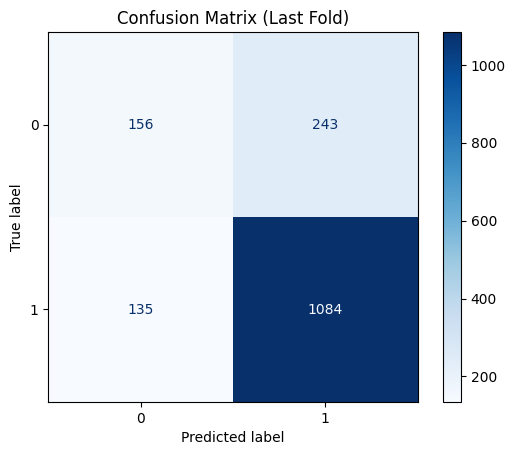

<Figure size 2500x5500 with 0 Axes>

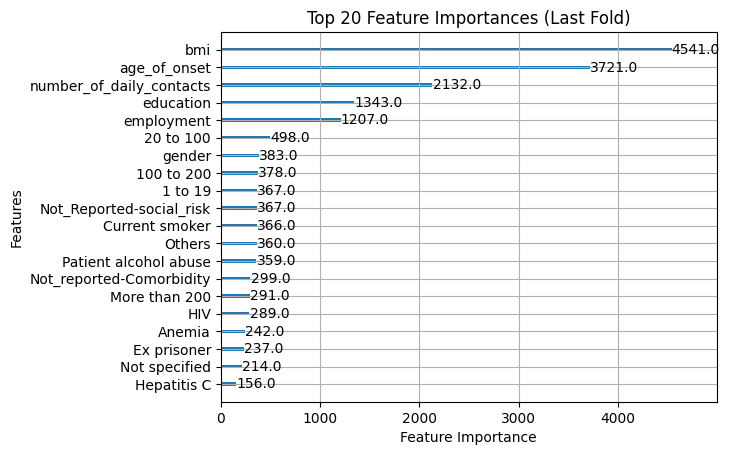

                                        Feature  Importance
17                                          bmi      4541.0
16                                 age_of_onset      3721.0
18                     number_of_daily_contacts      2132.0
0                                     education      1343.0
2                                    employment      1207.0
21                                    20 to 100       498.0
1                                        gender       383.0
20                                   100 to 200       378.0
19                                      1 to 19       367.0
8                      Not_Reported-social_risk       367.0
3                                Current smoker       366.0
33                                       Others       360.0
9                         Patient alcohol abuse       359.0
32                     Not_reported-Comorbidity       299.0
22                                More than 200       291.0
27                                      

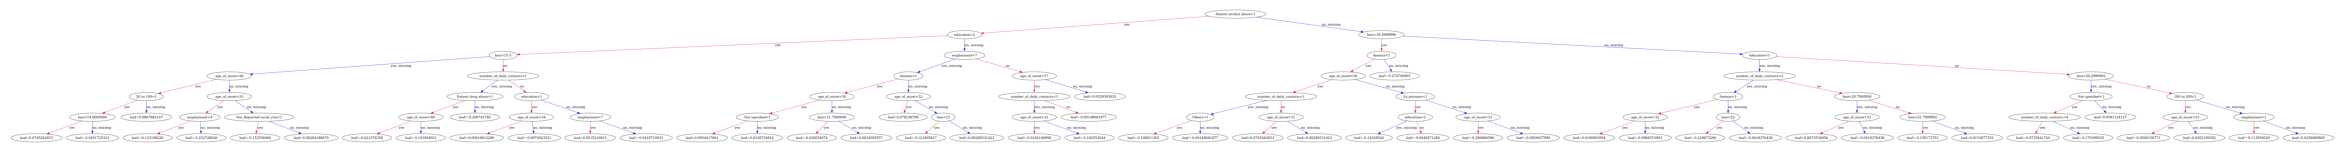

In [18]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
# clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

# X_train = X_train[feature_levels['pre-diagnosis']]
# X_test = X_test[feature_levels['pre-diagnosis']]

# Create a mask to identify columns in 'pre-diagnosis'
mask = X_test.columns.isin(feature_levels['pre-diagnosis'])
# Replace values of columns not in 'pre-diagnosis' with NaN
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
# ros = RandomOverSampler(random_state=42)

# # Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns

model, metrics, y_true1, y_prob1, y_pred1 = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

# xgb.plot_tree(model, num_trees=0, rankdir='LR')  # 'LR' for left-to-right
# plt.figure(figsize=(30,10))
# plt.show()

import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### post-diagnosis

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:37:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:38:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:39:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:40:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/

---------------------
AUCs per fold:
[np.float64(0.823536299765808), np.float64(0.8134804223673939), np.float64(0.821321780147662), np.float64(0.8420939294503692), np.float64(0.8220870058657719)]

5-Fold Cross-Validation Results:
Accuracy: 0.8294 ± 0.0066 [0.8246–0.8425]
Sensitivity (Recall): 0.9280 ± 0.0065 [0.9196–0.9393]
Specificity: 0.5283 ± 0.0337 [0.4812–0.5825]
AUC-ROC: 0.8245 ± 0.0095 [0.8135–0.8421]
F1-Score: 0.8912 ± 0.0038 [0.8881–0.8987]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [0.9926865  0.00219174 0.90557986 ... 0.9449396  0.9871818  0.966065  ]
y_pred = [1 0 1 ... 1 1 1]


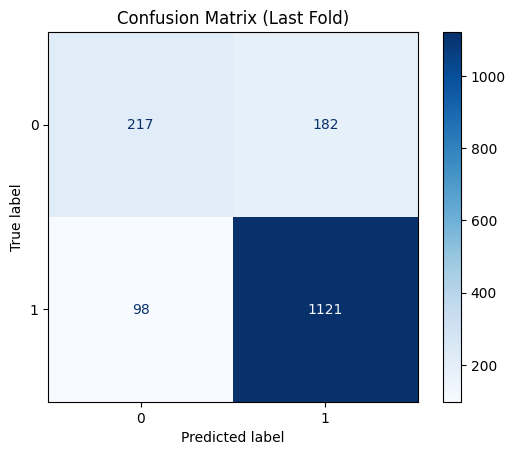

<Figure size 2500x5500 with 0 Axes>

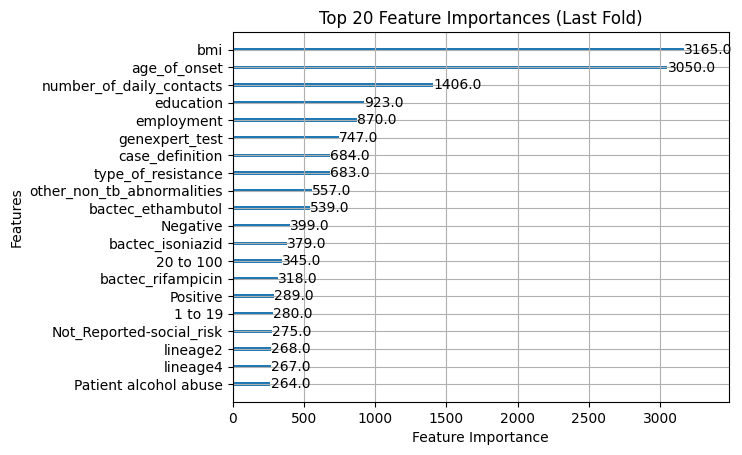

                                        Feature  Importance
17                                          bmi      3165.0
16                                 age_of_onset      3050.0
18                     number_of_daily_contacts      1406.0
0                                     education       923.0
2                                    employment       870.0
52                               genexpert_test       747.0
40                              case_definition       684.0
39                           type_of_resistance       683.0
59                   other_non_tb_abnormalities       557.0
55                            bactec_ethambutol       539.0
47                                     Negative       399.0
53                             bactec_isoniazid       379.0
21                                    20 to 100       345.0
54                            bactec_rifampicin       318.0
50                                     Positive       289.0
19                                      

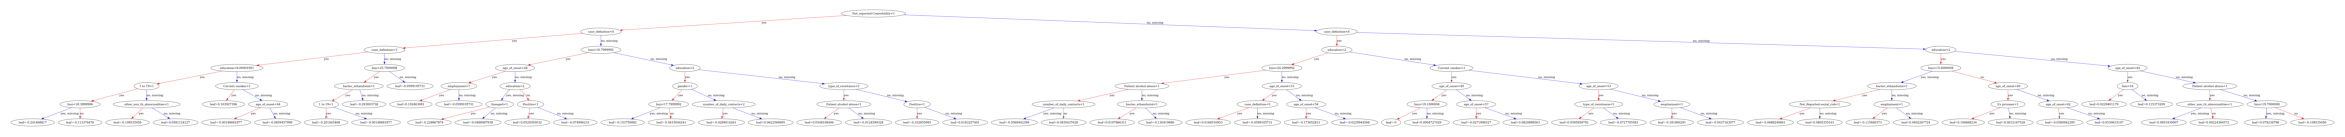

In [15]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)
clinical_lung_features_imputed = clinical_lung_features

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)


f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']
# X_train = X_train[f_]
# X_test = X_test[f_]
mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan

X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_true2, y_prob2, y_pred2= evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### post-scan

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:42:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:44:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:45:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/

---------------------
AUCs per fold:
[np.float64(0.8422654998151116), np.float64(0.8303196515879865), np.float64(0.8290771123872026), np.float64(0.8410910582444627), np.float64(0.8241131952111617)]

5-Fold Cross-Validation Results:
Accuracy: 0.8325 ± 0.0038 [0.8269–0.8376]
Sensitivity (Recall): 0.9346 ± 0.0058 [0.9286–0.9443]
Specificity: 0.5208 ± 0.0180 [0.4962–0.5475]
AUC-ROC: 0.8334 ± 0.0071 [0.8241–0.8423]
F1-Score: 0.8937 ± 0.0025 [0.8899–0.8968]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [0.99312943 0.01028753 0.9433281  ... 0.9799525  0.9551914  0.91988176]
y_pred = [1 0 1 ... 1 1 1]


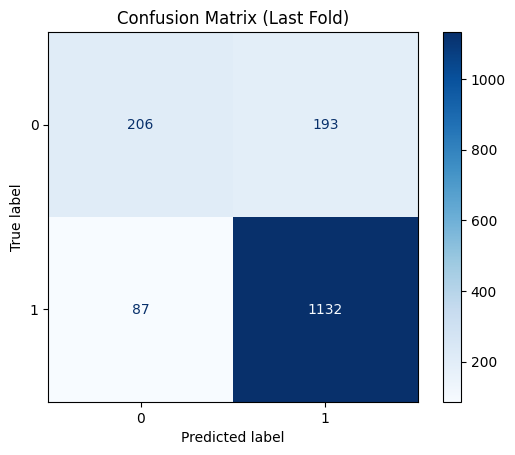

<Figure size 2500x5500 with 0 Axes>

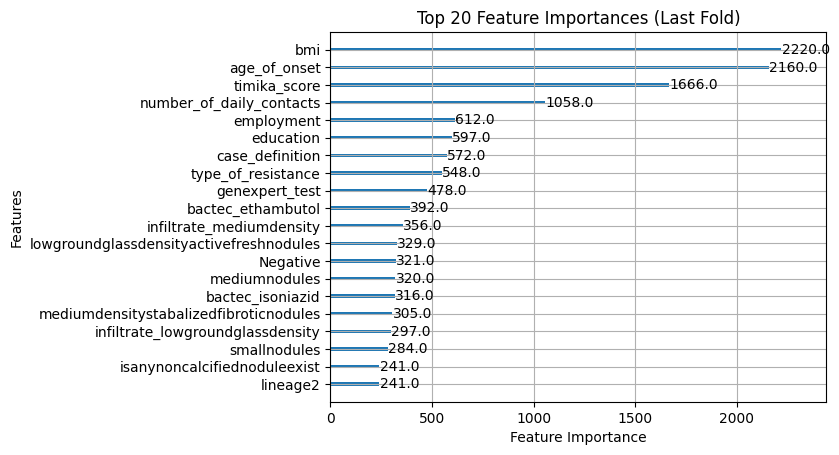

                     Feature  Importance
16                       bmi      2220.0
15              age_of_onset      2160.0
80              timika_score      1666.0
17  number_of_daily_contacts      1058.0
2                 employment       612.0
..                       ...         ...
35             Renal disease         6.0
53         lineage2-lineage4         5.0
7                 Immigrants         1.0
14         internal migrants         1.0
40                     A15.2         1.0

[82 rows x 2 columns]


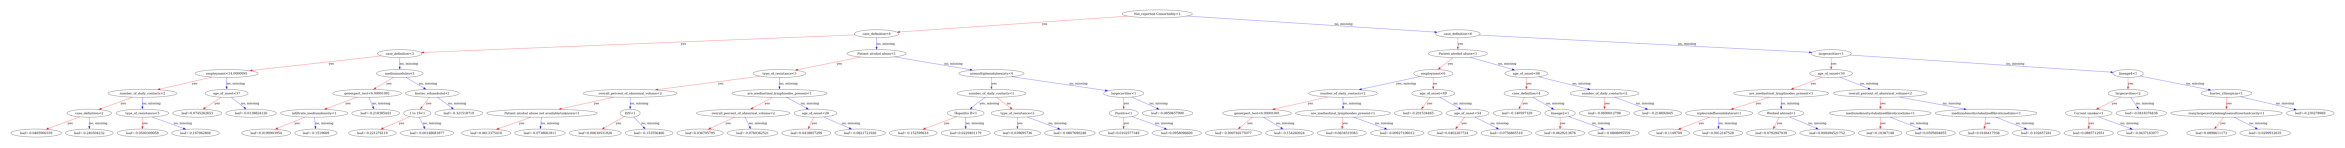

In [16]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['post-scan']
# X_train = X_train[f_]
# X_test = X_test[f_]


mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_true3, y_prob3, y_pred3 = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)


import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### Treatment-period no scan

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:47:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:48:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(s

---------------------
AUCs per fold:
[np.float64(0.9498469534491968), np.float64(0.9641419121574428), np.float64(0.9502502050861361), np.float64(0.959019688269073), np.float64(0.9556643865611527)]

5-Fold Cross-Validation Results:
Accuracy: 0.9296 ± 0.0018 [0.9271–0.9314]
Sensitivity (Recall): 0.9706 ± 0.0039 [0.9655–0.9754]
Specificity: 0.8042 ± 0.0133 [0.7845–0.8225]
AUC-ROC: 0.9558 ± 0.0054 [0.9498–0.9641]
F1-Score: 0.9541 ± 0.0012 [0.9523–0.9551]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [9.9927527e-01 1.4528077e-05 9.8630941e-01 ... 9.8653680e-01 9.9958569e-01
 9.8331106e-01]
y_pred = [1 0 1 ... 1 1 1]


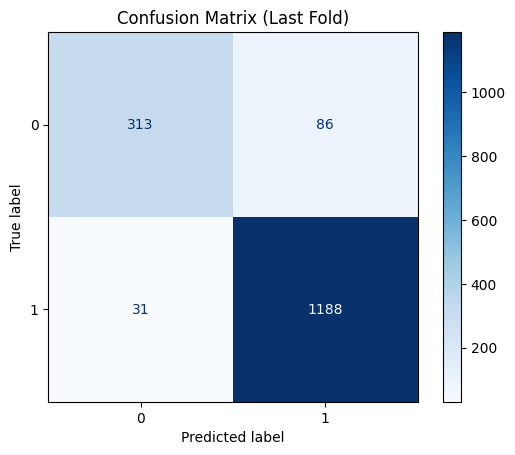

<Figure size 2500x5500 with 0 Axes>

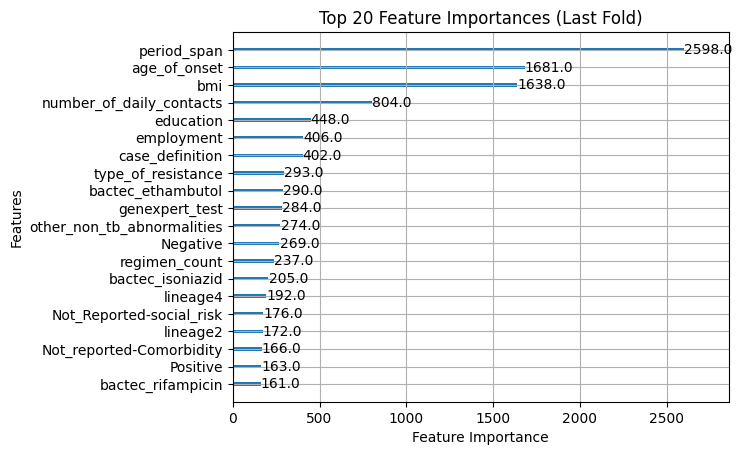

                      Feature  Importance
76                period_span      2598.0
13               age_of_onset      1681.0
14                        bmi      1638.0
15   number_of_daily_contacts       804.0
0                   education       448.0
..                        ...         ...
6                    Homeless         3.0
12          internal migrants         2.0
25                Hepatitis B         2.0
73                 Terizidone         2.0
66  Not_Reported-regimen_drug         1.0

[83 rows x 2 columns]


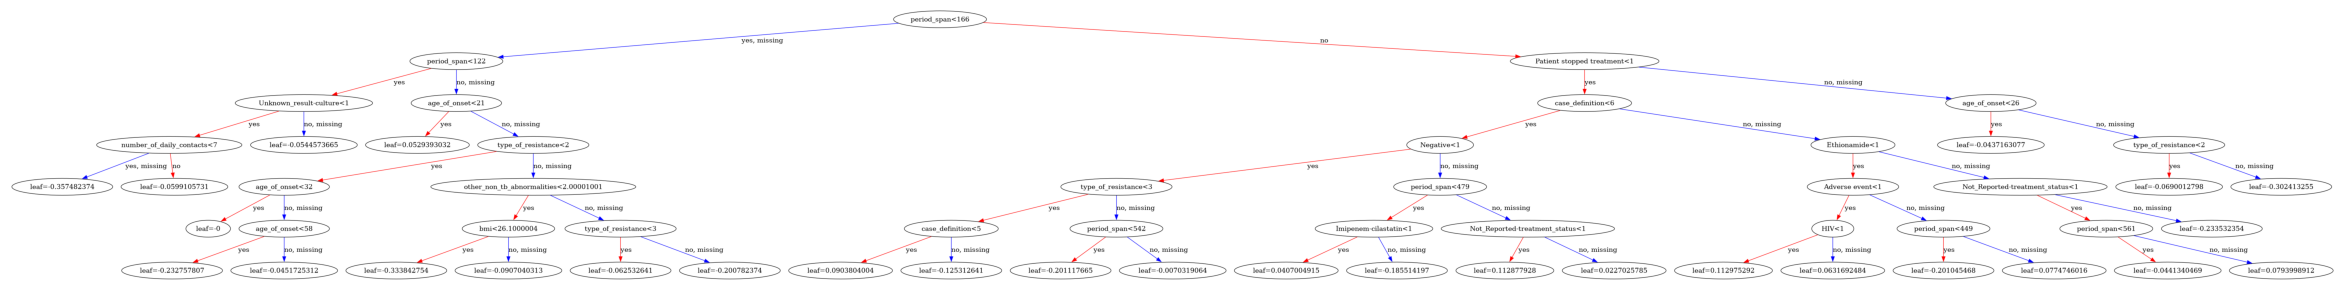

In [17]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_true4, y_prob4, y_pred4 = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### drop period span

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:53:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:54:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(s

---------------------
AUCs per fold:
[np.float64(0.9058301491433502), np.float64(0.8918792883848967), np.float64(0.899765176374077), np.float64(0.8973072190319935), np.float64(0.8923858045441743)]

5-Fold Cross-Validation Results:
Accuracy: 0.8766 ± 0.0048 [0.8684–0.8826]
Sensitivity (Recall): 0.9511 ± 0.0022 [0.9483–0.9549]
Specificity: 0.6490 ± 0.0173 [0.6250–0.6767]
AUC-ROC: 0.8974 ± 0.0051 [0.8919–0.9058]
F1-Score: 0.9207 ± 0.0029 [0.9156–0.9242]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [9.9823606e-01 5.0893224e-05 8.5952091e-01 ... 9.3551064e-01 9.9911982e-01
 9.6990484e-01]
y_pred = [1 0 1 ... 1 1 1]


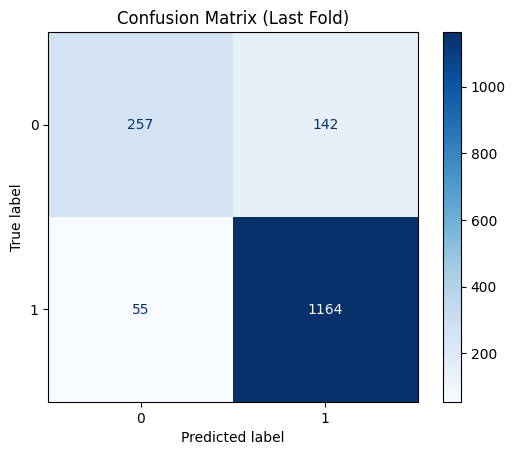

<Figure size 2500x5500 with 0 Axes>

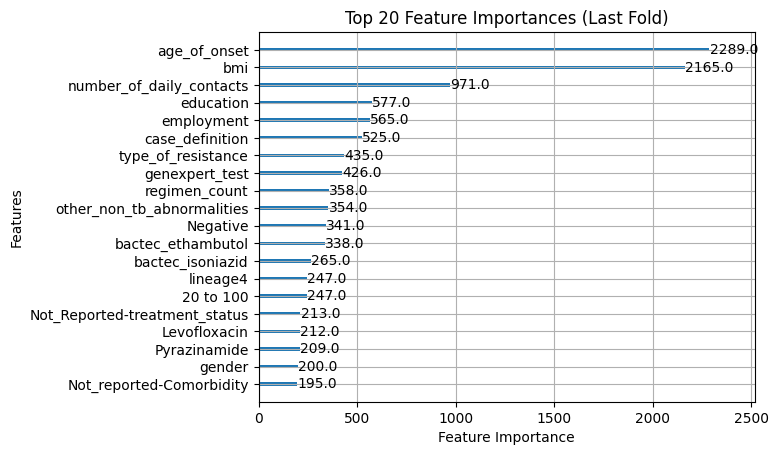

ValueError: too many values to unpack (expected 2)

In [18]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
f_.remove('period_span')
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
# fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
# plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
# plt.show()


fig, ax = plt.subplots(figsize=(30, 20))
plot_tree(model, num_trees=2, ax=ax, max_depth=1)
plt.show()


/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:11:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(s

---------------------
AUCs per fold:
[np.float64(0.9058301491433502), np.float64(0.8918792883848967), np.float64(0.899765176374077), np.float64(0.8973072190319935), np.float64(0.8923858045441743)]

5-Fold Cross-Validation Results:
Accuracy: 0.8766 ± 0.0048 [0.8684–0.8826]
Sensitivity (Recall): 0.9511 ± 0.0022 [0.9483–0.9549]
Specificity: 0.6490 ± 0.0173 [0.6250–0.6767]
AUC-ROC: 0.8974 ± 0.0051 [0.8919–0.9058]
F1-Score: 0.9207 ± 0.0029 [0.9156–0.9242]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [9.9823606e-01 5.0893224e-05 8.5952091e-01 ... 9.3551064e-01 9.9911982e-01
 9.6990484e-01]
y_pred = [1 0 1 ... 1 1 1]


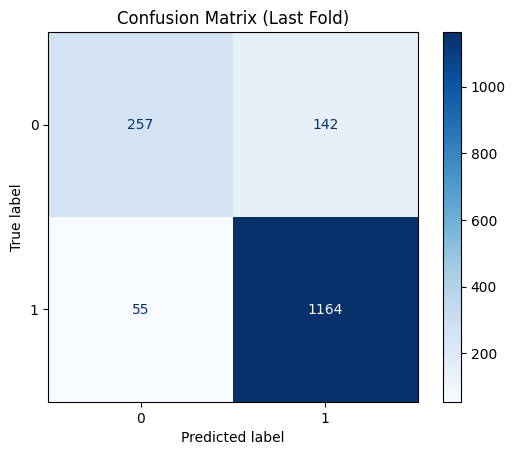

<Figure size 2500x5500 with 0 Axes>

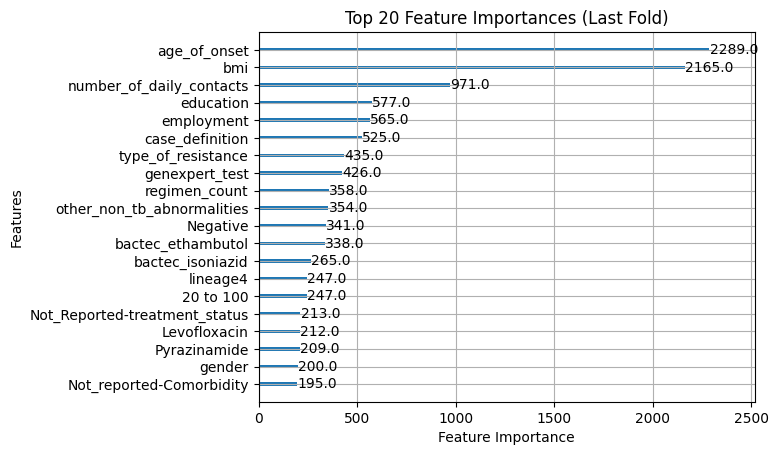

ValueError: too many values to unpack (expected 2)

In [19]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
f_.remove('period_span')
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=5,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
# fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
# plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
# plt.show()


# fig, ax = plt.subplots(figsize=(30, 20))
# plot_tree(model, num_trees=2, ax=ax, max_depth=5)
# plt.show()

from xgboost import to_graphviz

# graph = to_graphviz(
#     model,
#     num_trees=4,
#     rankdir='TB',
#     condition_node_params={
#         'shape': 'box',
#         'style': 'filled,rounded',
#         'fillcolor': '#E0F7FA',
#         'fontsize': '25'
#     },
#     leaf_node_params={
#         'shape': 'box',
#         'style': 'filled',
#         'fillcolor': '#F1F8E9',
#         'fontsize': '25'
#     },  
#     size="15,15"  # width,height in inches
# )


# display(graph)

from xgboost import to_graphviz
from graphviz import Source

# Generate the base DOT graph
graph = to_graphviz(
    model,
    num_trees=4,
    rankdir='TB',
    condition_node_params={
        'shape': 'box',
        'style': 'filled,rounded',
        'fillcolor': '#E0F7FA',
        'fontsize': '25'
    },
    leaf_node_params={
        'shape': 'box',
        'style': 'filled',
        'fillcolor': '#F1F8E9',
        'fontsize': '25'
    },
    size="15,15"
)

# Convert the DOT source to string
dot = graph.source

# Modify edge label font size
# This regex matches edge labels like [label=yes]
import re
dot_modified = re.sub(r'(\[label=)(yes|no)(\])', r'\1\2 fontsize=24\3', dot)

# Optional: more general regex to include all edge attributes
dot_modified = re.sub(r'label=(yes|no)', r'label="\1", fontsize=24', dot_modified)

# Render the graph
display(Source(dot_modified))



### full model

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:59:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:59:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [14:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt

---------------------
AUCs per fold:
[0.9501540737088624, 0.9638378733719545, 0.9571657095980313, 0.9629081214109925, 0.9571231195297513]

5-Fold Cross-Validation Results:
Accuracy: 0.9275 ± 0.0032 [0.9227–0.9321]
Sensitivity (Recall): 0.9723 ± 0.0014 [0.9697–0.9737]
Specificity: 0.7907 ± 0.0141 [0.7669–0.8100]
AUC-ROC: 0.9582 ± 0.0049 [0.9502–0.9638]
F1-Score: 0.9528 ± 0.0020 [0.9500–0.9556]

Values for AUC/ROC plot (last fold):
y_true = [1 0 1 ... 1 1 1]
y_prob = [9.9988735e-01 2.7311221e-04 9.9670273e-01 ... 9.9697185e-01 9.9982661e-01
 9.9720973e-01]
y_pred = [1 0 1 ... 1 1 1]


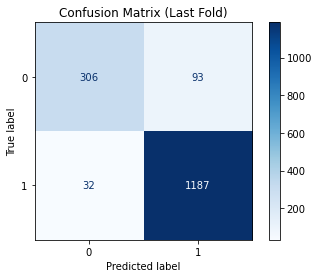

<Figure size 1800x3960 with 0 Axes>

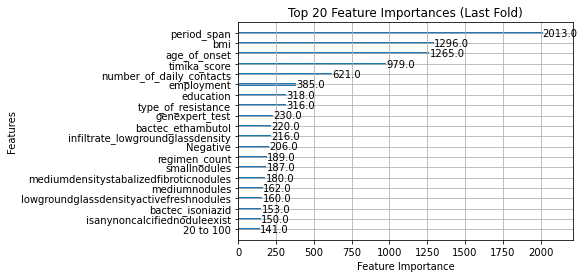

NameError: name 'drug' is not defined

In [10]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']+ feature_levels['post-scan']
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_true5, y_prob5, y_pred5 = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
# fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
# plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
# plt.show()


# # Plot only up to 5 levels of depth
fig, ax = plt.subplots(figsize=(30, 20))
plot_tree(model, num_trees=5, ax=ax, max_depth=3)
plt.show()


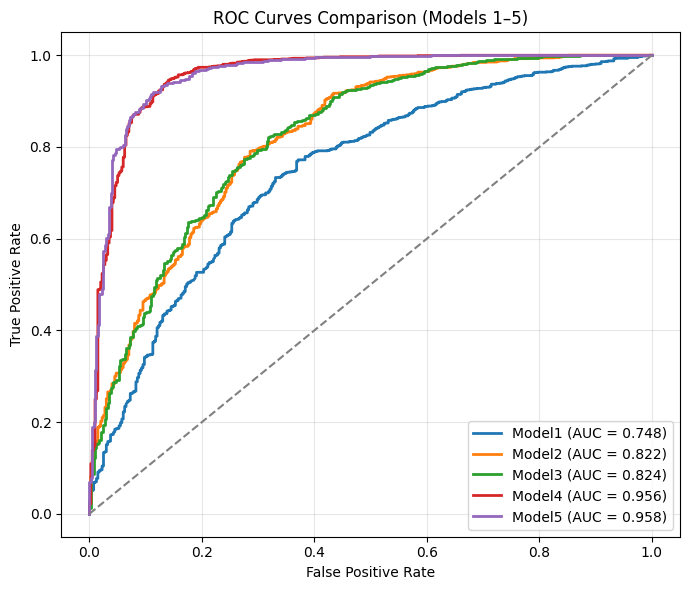

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Store all your sets in a list for looping
y_trues = [y_true1, y_true2, y_true3, y_true4, y_true5]
y_probs = [y_prob1, y_prob2, y_prob3, y_prob4, y_prob5]
labels = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5']

plt.figure(figsize=(7, 6))

for i in range(5):
    fpr, tpr, _ = roc_curve(y_trues[i], y_probs[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{labels[i]} (AUC = {roc_auc:.3f})')

# Add diagonal reference line
plt.plot([0, 1], [0, 1], color='grey', lw=1.5, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison (Models 1–5)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### significance test

In [68]:
# Re-import necessary libraries after kernel reset
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from itertools import combinations

# Define updated models (excluding Logistic Regression)
model_scores_updated = {
    "Model 1": [
        np.float64(0.8971024007458628), np.float64(0.8939534612695207),
        np.float64(0.8979906219703184), np.float64(0.903801966494174),
        np.float64(0.8929621436263895)
    ],
    "Model 2": [
        np.float64(0.9469901328568099), np.float64(0.9468568875767228),
        np.float64(0.943490224227509), np.float64(0.9456010481748307),
        np.float64(0.9426812436578813)
    ],
    "Model 3": [
        np.float64(0.9591997513790691), np.float64(0.9618320254836454),
        np.float64(0.9568060630919532), np.float64(0.9558639083391327),
        np.float64(0.9535661660361807)
    ],
    "Model 4": [
        np.float64(0.9916945070313108), np.float64(0.9931403931318468),
        np.float64(0.9896703395729236), np.float64(0.9902289577736394),
        np.float64(0.9901410914859122)
    ],
    "Full Model": [
        np.float64(0.9928855566778028), np.float64(0.9937207676171237),
        np.float64(0.9912690792253959), np.float64(0.9912164815383598),
        np.float64(0.9920243848387886)
    ]
}

# Perform pairwise Wilcoxon tests
results_updated = []
for (name1, scores1), (name2, scores2) in combinations(model_scores_updated.items(), 2):
    stat, p = wilcoxon(scores1, scores2)
    results_updated.append({
        "Model A": name1,
        "Model B": name2,
        "p-value": p,
        "Significant (p<0.05)": p < 0.05
    })

# Convert to DataFrame
results_df_updated = pd.DataFrame(results_updated)

# Display

results_df_updated


,Model A,Model B,p-value,Significant (p<0.05)
0,Model 1,Model 2,0.0625,False
1,Model 1,Model 3,0.0625,False
2,Model 1,Model 4,0.0625,False
3,Model 1,Full Model,0.0625,False
4,Model 2,Model 3,0.0625,False
5,Model 2,Model 4,0.0625,False
6,Model 2,Full Model,0.0625,False
7,Model 3,Model 4,0.0625,False
8,Model 3,Full Model,0.0625,False
9,Model 4,Full Model,0.0625,False


# other models

#### logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Logistic Regression model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_logistic_regression(X_train, X_test, y_train, y_test, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates Logistic Regression with Stratified K-Fold CV.
    
    Returns:
    - model (LogisticRegression): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge input data


    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test_scaled, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        # Flatten labels
        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        # Scale
        continuous_cols = [col for col in X_tr.columns if X_tr[col].nunique() > 2]

        # Step 2: Create column transformer to scale only continuous features
        scaler = ColumnTransformer(
            transformers=[
                ("scale", StandardScaler(), continuous_cols)
            ],
            remainder='passthrough'  # Keep binary and other untouched
        )

        # Step 3: Fit and transform
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        # Train logistic regression
        model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
        model.fit(X_tr_scaled, y_tr)

        # Predict
        y_pred = model.predict(X_te_scaled)
        y_prob = model.predict_proba(X_te_scaled)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        # Save last fold model + data
        if fold == n_splits - 1:
            last_model = model
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    # Summary
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }
    print('---------------------')
    print('aucs:')
    print(aucs)
    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation (Logistic Regression):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    if plot_last_fold:
        # Confusion matrix
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

    return last_model, metrics

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_logistic_regression(
    X_train, X_test, y_train, y_test,
    n_splits=5, plot_last_fold=True
):

    # Merge into single dataset
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_params = None, None
    last_X_test_scaled, last_y_test, last_y_pred = None, None, None

    # Hyperparameter grid
    param_grid = {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"],
    }

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        print(f"\n=== Fold {fold+1} ===")

        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

        # Identify continuous features
        continuous_cols = [col for col in X_tr.columns if X_tr[col].nunique() > 2]

        # Scaler
        scaler = ColumnTransformer(
            transformers=[("scale", StandardScaler(), continuous_cols)],
            remainder="passthrough"
        )

        # Scale data
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        # Grid search
        base_model = LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            random_state=42
        )

        grid = GridSearchCV(
            base_model,
            param_grid,
            cv=3,
            scoring="roc_auc",
            n_jobs=-1
        )

        grid.fit(X_tr_scaled, y_tr)
        best_model = grid.best_estimator_
        best_params = grid.best_params_

        print("Best parameters:", best_params)

        # Predictions
        y_pred = best_model.predict(X_te_scaled)
        y_prob = best_model.predict_proba(X_te_scaled)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        # Save last fold model
        if fold == n_splits - 1:
            last_model = best_model
            last_params = best_params
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    # Summary display
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        "Testing Accuracy": summarise(accs),
        "Sensitivity (Recall)": summarise(sens),
        "Specificity": summarise(specs),
        "AUC-ROC": summarise(aucs),
        "F1-Score": summarise(f1s),
    }

    print("\n=== Final tuned parameters from last fold ===")
    print(last_params)

    print(f"\n{n_splits}-Fold Cross-Validation Summary:")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    # Plot confusion matrix
    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix (Last Fold)")
        plt.show()

    return last_model, last_params, metrics, y_te, y_prob



=== Fold 1 ===
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Fold 2 ===
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Fold 3 ===
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Fold 4 ===
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Fold 5 ===
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

=== Final tuned parameters from last fold ===
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

5-Fold Cross-Validation Summary:
Testing Accuracy: 0.8684 ± 0.0059 [0.8586–0.8734]
Sensitivity (Recall): 0.8865 ± 0.0064 [0.8769–0.8951]
Specificity: 0.8132 ± 0.0132 [0.8020–0.8371]
AUC-ROC: 0.9117 ± 0.0028 [0.9078–0.9156]
F1-Score: 0.9103 ± 0.0042 [0.9033–0.9142]


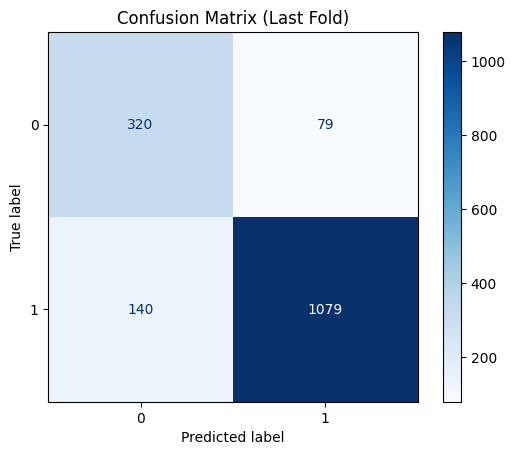

{'Testing Accuracy': {'mean±sd': '0.8684 ± 0.0059', 'range': '[0.8586–0.8734]'}, 'Sensitivity (Recall)': {'mean±sd': '0.8865 ± 0.0064', 'range': '[0.8769–0.8951]'}, 'Specificity': {'mean±sd': '0.8132 ± 0.0132', 'range': '[0.8020–0.8371]'}, 'AUC-ROC': {'mean±sd': '0.9117 ± 0.0028', 'range': '[0.9078–0.9156]'}, 'F1-Score': {'mean±sd': '0.9103 ± 0.0042', 'range': '[0.9033–0.9142]'}}


In [17]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_resampled = poly.fit_transform(X_train_resampled)
# X_test = poly.transform(X_test)
# X_train_resampled = pd.DataFrame(X_train_resampled)
# X_test = pd.DataFrame(X_test)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, _param_, metrics, y_te1, y_prob1 = evaluate_logistic_regression(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


#### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer

def evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Naive Bayes model.
    """
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_naive_bayes(
    X_train, X_test, y_train, y_test,
    n_splits=5, plot_last_fold=True
):

    # Merge data
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_params = None, None
    last_X_test_scaled, last_y_test, last_y_pred = None, None, None

    # Hyperparameter grid for GaussianNB
    param_grid = {
        "var_smoothing": np.logspace(-12, -6, 7)  # standard tuning range
    }

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        print(f"\n=== Fold {fold+1} ===")

        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

        # Identify continuous features
        continuous_cols = [col for col in X_tr.columns if X_tr[col].nunique() > 2]

        # Scale continuous variables
        scaler = ColumnTransformer(
            transformers=[("scale", StandardScaler(), continuous_cols)],
            remainder="passthrough"
        )

        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        # Grid search for GaussianNB
        base_model = GaussianNB()

        grid = GridSearchCV(
            base_model,
            param_grid,
            cv=3,
            scoring="roc_auc",
            n_jobs=-1
        )

        grid.fit(X_tr_scaled, y_tr)
        best_model = grid.best_estimator_
        best_params = grid.best_params_

        print("Best parameters:", best_params)

        # Predictions
        y_pred = best_model.predict(X_te_scaled)
        y_prob = best_model.predict_proba(X_te_scaled)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        # Save final fold model
        if fold == n_splits - 1:
            last_model = best_model
            last_params = best_params
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    # Summary helper
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        "Testing Accuracy": summarise(accs),
        "Sensitivity (Recall)": summarise(sens),
        "Specificity": summarise(specs),
        "AUC-ROC": summarise(aucs),
        "F1-Score": summarise(f1s),
    }

    print("\n=== Final tuned parameters from last fold ===")
    print(last_params)

    print(f"\n{n_splits}-Fold Cross-Validation Summary (Naive Bayes):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix (Last Fold)")
        plt.show()

    # return last_model, last_params, metrics
    return last_model, last_params, metrics, y_te, y_prob



=== Fold 1 ===
Best parameters: {'var_smoothing': np.float64(1e-06)}

=== Fold 2 ===
Best parameters: {'var_smoothing': np.float64(1e-06)}

=== Fold 3 ===
Best parameters: {'var_smoothing': np.float64(1e-06)}

=== Fold 4 ===
Best parameters: {'var_smoothing': np.float64(1e-06)}

=== Fold 5 ===
Best parameters: {'var_smoothing': np.float64(1e-09)}

=== Final tuned parameters from last fold ===
{'var_smoothing': np.float64(1e-09)}

5-Fold Cross-Validation Summary (Naive Bayes):
Testing Accuracy: 0.7106 ± 0.0823 [0.5501–0.7770]
Sensitivity (Recall): 0.7029 ± 0.1417 [0.4389–0.8516]
Specificity: 0.7341 ± 0.1154 [0.5489–0.8897]
AUC-ROC: 0.7998 ± 0.0073 [0.7919–0.8135]
F1-Score: 0.7765 ± 0.0929 [0.5951–0.8520]


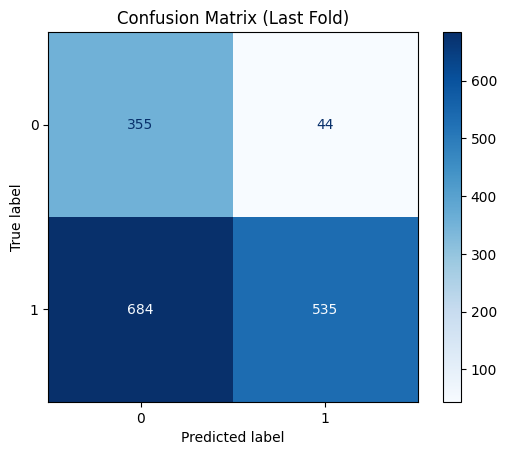

{'Testing Accuracy': {'mean±sd': '0.7106 ± 0.0823', 'range': '[0.5501–0.7770]'}, 'Sensitivity (Recall)': {'mean±sd': '0.7029 ± 0.1417', 'range': '[0.4389–0.8516]'}, 'Specificity': {'mean±sd': '0.7341 ± 0.1154', 'range': '[0.5489–0.8897]'}, 'AUC-ROC': {'mean±sd': '0.7998 ± 0.0073', 'range': '[0.7919–0.8135]'}, 'F1-Score': {'mean±sd': '0.7765 ± 0.0929', 'range': '[0.5951–0.8520]'}}


In [19]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, param_, metrics, y_te2, y_prob2 = evaluate_naive_bayes(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


#### SVM

In [32]:

from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer

def evaluate_svm(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Support Vector Machine (SVM) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(probability=True, class_weight='balanced', random_state=42, kernel='poly', degree=2)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_svm(X_train, X_test, y_train, y_test, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates SVM with Stratified K-Fold cross-validation.
    
    Returns:
    - model (SVC): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge input data
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test_scaled, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        continuous_cols = [col for col in X_train.columns if X_train[col].nunique() > 2]

        scaler = ColumnTransformer(
            transformers=[
                ("scale", StandardScaler(), continuous_cols)
            ],
            remainder='passthrough'  # Keep binary and other untouched
        )

        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        model = SVC(
            probability=True,
            class_weight='balanced',
            random_state=42,
            kernel='poly',
            degree=2
        )
        model.fit(X_tr_scaled, y_tr)

        y_pred = model.predict(X_te_scaled)
        y_prob = model.predict_proba(X_te_scaled)[:, 1]

        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation (SVM - Poly Kernel):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    print("\nPer-fold AUC-ROC values:")
    for i, auc in enumerate(aucs, 1):
        print(f"  Fold {i}: {auc:.4f}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

    return last_model, metrics, y_te, y_prob



# def evaluate_svm(
#     X_train, X_test, y_train, y_test,
#     n_splits=5, plot_last_fold=True
# ):

#     # Merge datasets
#     X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
#     y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     accs, sens, specs, aucs, f1s = [], [], [], [], []
#     last_model, last_params = None, None
#     last_X_test_scaled, last_y_test, last_y_pred = None, None, None

#     # Hyperparameter space
#     param_grid = {
#         "C": [0.1, 1, 10],
#         "kernel": ["linear", "rbf", "poly"],
#         "gamma": ["scale", "auto"],
#         "degree": [2, 3],   # only used for poly
#     }

#     for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
#         print(f"\n=== Fold {fold+1} ===")

#         X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
#         y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

#         # Identify continuous features
#         continuous_cols = [col for col in X_tr.columns if X_tr[col].nunique() > 2]

#         # Scaling
#         scaler = ColumnTransformer(
#             transformers=[("scale", StandardScaler(), continuous_cols)],
#             remainder="passthrough"
#         )

#         X_tr_scaled = scaler.fit_transform(X_tr)
#         X_te_scaled = scaler.transform(X_te)

#         # Base SVM
#         base_svm = SVC(
#             probability=True,
#             class_weight="balanced",
#             random_state=42
#         )

#         # Grid search
#         grid = GridSearchCV(
#             base_svm,
#             param_grid,
#             scoring="roc_auc",
#             cv=3,
#             n_jobs=-1
#         )

#         grid.fit(X_tr_scaled, y_tr)

#         best_model = grid.best_estimator_
#         best_params = grid.best_params_

#         print("Best parameters:", best_params)

#         # Predictions
#         y_pred = best_model.predict(X_te_scaled)
#         y_prob = best_model.predict_proba(X_te_scaled)[:, 1]

#         # Metrics
#         accs.append(accuracy_score(y_te, y_pred))
#         sens.append(recall_score(y_te, y_pred, pos_label=1))
#         specs.append(recall_score(y_te, y_pred, pos_label=0))
#         aucs.append(roc_auc_score(y_te, y_prob))
#         f1s.append(f1_score(y_te, y_pred))

#         if fold == n_splits - 1:
#             last_model = best_model
#             last_params = best_params
#             last_X_test_scaled = X_te_scaled
#             last_y_test = y_te
#             last_y_pred = y_pred

#     # Summary formatter
#     def summarise(vals):
#         return {
#             "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
#             "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
#         }

#     metrics = {
#         "Testing Accuracy": summarise(accs),
#         "Sensitivity (Recall)": summarise(sens),
#         "Specificity": summarise(specs),
#         "AUC-ROC": summarise(aucs),
#         "F1-Score": summarise(f1s),
#     }

#     print("\n=== Final tuned parameters from last fold ===")
#     print(last_params)

#     print(f"\n{n_splits}-Fold Cross-Validation Summary (SVM):")
#     for k, v in metrics.items():
#         print(f"{k}: {v['mean±sd']} {v['range']}")

#     if plot_last_fold:
#         cm = confusion_matrix(last_y_test, last_y_pred)
#         disp = ConfusionMatrixDisplay(cm, display_labels=last_model.classes_)
#         disp.plot(cmap=plt.cm.Blues)
#         plt.title("Confusion Matrix (Last Fold)")
#         plt.show()

#     return last_model, last_params, metrics


5-Fold Cross-Validation (SVM - Poly Kernel):
Testing Accuracy: 0.8837 ± 0.0072 [0.8752–0.8918]
Sensitivity (Recall): 0.9211 ± 0.0077 [0.9114–0.9352]
Specificity: 0.7696 ± 0.0209 [0.7393–0.8000]
AUC-ROC: 0.9165 ± 0.0071 [0.9083–0.9288]
F1-Score: 0.9227 ± 0.0048 [0.9167–0.9287]

Per-fold AUC-ROC values:
  Fold 1: 0.9128
  Fold 2: 0.9133
  Fold 3: 0.9083
  Fold 4: 0.9288
  Fold 5: 0.9190


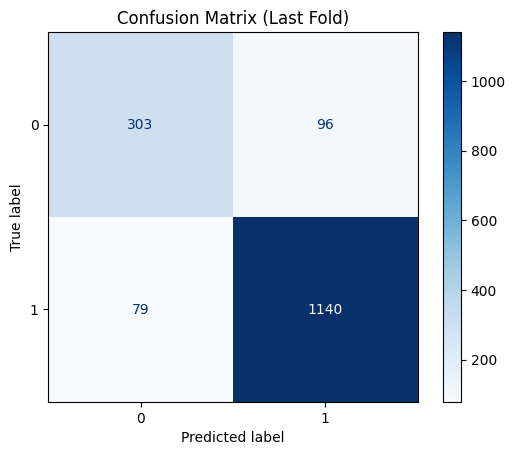

{'Testing Accuracy': {'mean±sd': '0.8837 ± 0.0072', 'range': '[0.8752–0.8918]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9211 ± 0.0077', 'range': '[0.9114–0.9352]'}, 'Specificity': {'mean±sd': '0.7696 ± 0.0209', 'range': '[0.7393–0.8000]'}, 'AUC-ROC': {'mean±sd': '0.9165 ± 0.0071', 'range': '[0.9083–0.9288]'}, 'F1-Score': {'mean±sd': '0.9227 ± 0.0048', 'range': '[0.9167–0.9287]'}}


In [33]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_te3, y_prob3  = evaluate_svm(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


In [93]:
y_prob3

array([0.96076673, 0.06877718, 0.96260737, ..., 0.94919584, 0.96543558,
       0.99373534])

In [94]:
y_prob2

array([9.99999089e-001, 6.28573565e-121, 9.99736429e-001, ...,
       9.99560625e-001, 5.08457775e-006, 6.85883520e-007])

#### K-Nearest Neighbors (k-NN)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

def evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    """
    Trains and evaluates a k-Nearest Neighbors (k-NN) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_knn(
    X_train, X_test, y_train, y_test,
    n_splits=5, plot_last_fold=True
):

    # Merge datasets
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, f1s = [], [], [], []
    last_model, last_params = None, None
    last_X_test_scaled, last_y_test, last_y_pred = None, None, None

    # Hyperparameter search space
    param_grid = {
        "n_neighbors": [3, 5, 7, 11, 15],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
        "p": [1, 2]  # p=1 manhattan, p=2 euclidean
    }

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        print(f"\n=== Fold {fold+1} ===")

        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

        # Identify continuous features
        continuous_cols = [col for col in X_tr.columns if X_tr[col].nunique() > 2]

        # Standardise only continuous columns
        scaler = ColumnTransformer(
            transformers=[("scale", StandardScaler(), continuous_cols)],
            remainder='passthrough'
        )

        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        # Base KNN model
        base_knn = KNeighborsClassifier()

        # Grid search
        grid = GridSearchCV(
            base_knn,
            param_grid,
            cv=3,
            scoring="roc_auc",
            n_jobs=-1
        )

        grid.fit(X_tr_scaled, y_tr)
        best_model = grid.best_estimator_
        best_params = grid.best_params_

        print("Best parameters:", best_params)

        # Predictions
        y_pred = best_model.predict(X_te_scaled)
        y_prob = best_model.predict_proba(X_te_scaled)[:, 1]
        

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = best_model
            last_params = best_params
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    # Summary stats
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        "Testing Accuracy": summarise(accs),
        "Sensitivity (Recall)": summarise(sens),
        "Specificity": summarise(specs),
        "F1-Score": summarise(f1s),
    }

    print("\n=== Final tuned parameters from last fold ===")
    print(last_params)

    print(f"\n{n_splits}-Fold Cross-Validation Summary (KNN):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix (Last Fold)")
        plt.show()

    # return last_model, last_params, metrics
    return last_model, last_params, metrics, y_te, y_prob



=== Fold 1 ===
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

=== Fold 2 ===
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

=== Fold 3 ===
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

=== Fold 4 ===
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

=== Fold 5 ===
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

=== Final tuned parameters from last fold ===
{'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

5-Fold Cross-Validation Summary (KNN):
Testing Accuracy: 0.8320 ± 0.0070 [0.8264–0.8450]
Sensitivity (Recall): 0.9856 ± 0.0031 [0.9811–0.9893]
Specificity: 0.3630 ± 0.0257 [0.3383–0.4125]
F1-Score: 0.8984 ± 0.0040 [0.8949–0.9055]


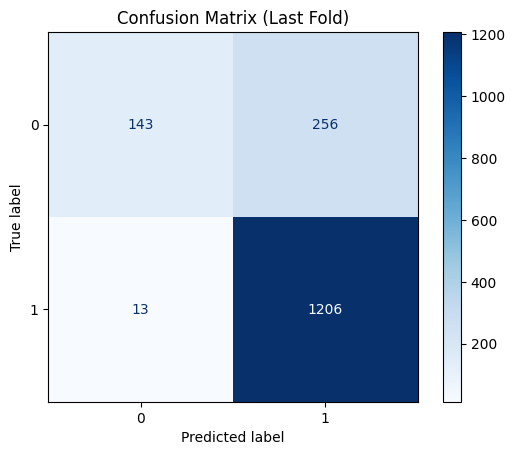

{'Testing Accuracy': {'mean±sd': '0.8320 ± 0.0070', 'range': '[0.8264–0.8450]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9856 ± 0.0031', 'range': '[0.9811–0.9893]'}, 'Specificity': {'mean±sd': '0.3630 ± 0.0257', 'range': '[0.3383–0.4125]'}, 'F1-Score': {'mean±sd': '0.8984 ± 0.0040', 'range': '[0.8949–0.9055]'}}


In [23]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, param_, metrics, y_te4, y_prob4  = evaluate_knn(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


#### mlp

In [24]:
from sklearn.neural_network import MLPClassifier

def evaluate_mlp(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,50,30), max_iter=1000):
    """
    Trains and evaluates a Multi-Layer Perceptron (MLP) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_mlp(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100, 50, 30), max_iter=1000, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates MLP using Stratified K-Fold CV.

    Returns:
    - model (MLPClassifier): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge full dataset
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test_scaled, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        # Scale features
        continuous_cols = [col for col in X_train.columns if X_train[col].nunique() > 2]

        scaler = ColumnTransformer(
            transformers=[
                ("scale", StandardScaler(), continuous_cols)
            ],
            remainder='passthrough'  # Keeps binary vars untouched
        )
        
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)


        # Define and train MLP
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=max_iter,
            random_state=42
        )
        model.fit(X_tr_scaled, y_tr)

        # Predict
        y_pred = model.predict(X_te_scaled)
        y_prob = model.predict_proba(X_te_scaled)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation (MLP, hidden_layer_sizes={hidden_layer_sizes}):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    print("\nPer-fold AUC-ROC values:")
    for i, auc in enumerate(aucs, 1):
        print(f"  Fold {i}: {auc:.4f}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

    return last_model, metrics


def evaluate_mlp(
    X_train, X_test, y_train, y_test,
    n_splits=5, plot_last_fold=True
):

    # Merge datasets
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_params = None, None
    last_X_test_scaled, last_y_test, last_y_pred = None, None, None

    # Hyperparameter search space for MLP
    param_grid = {
        "hidden_layer_sizes": [(50,), (100,), (100, 50), (100, 50, 25)],
        "activation": ["relu", "tanh"],
        "solver": ["adam"],
        "alpha": [0.0001, 0.001, 0.01],
        "learning_rate_init": [0.001, 0.01]
    }

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        print(f"\n=== Fold {fold+1} ===")

        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

        # Identify continuous features
        continuous_cols = [col for col in X_tr.columns if X_tr[col].nunique() > 2]

        # Scaling
        scaler = ColumnTransformer(
            transformers=[("scale", StandardScaler(), continuous_cols)],
            remainder="passthrough"
        )
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_te_scaled = scaler.transform(X_te)

        base_model = MLPClassifier(
            max_iter=1000,
            random_state=42
        )

        # Grid search
        grid = GridSearchCV(
            base_model,
            param_grid,
            cv=3,
            scoring="roc_auc",
            n_jobs=-1
        )
        grid.fit(X_tr_scaled, y_tr)

        best_model = grid.best_estimator_
        best_params = grid.best_params_

        print("Best parameters:", best_params)

        # Predict
        y_pred = best_model.predict(X_te_scaled)
        y_prob = best_model.predict_proba(X_te_scaled)[:, 1]

        # Metrics
        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = best_model
            last_params = best_params
            last_X_test_scaled = X_te_scaled
            last_y_test = y_te
            last_y_pred = y_pred

    # Summary
    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        "Testing Accuracy": summarise(accs),
        "Sensitivity (Recall)": summarise(sens),
        "Specificity": summarise(specs),
        "AUC-ROC": summarise(aucs),
        "F1-Score": summarise(f1s),
    }

    print("\n=== Final tuned parameters from last fold ===")
    print(last_params)

    print(f"\n{n_splits}-Fold Cross-Validation Summary (MLP):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title("Confusion Matrix (Last Fold)")
        plt.show()

    # return last_model, last_params, metrics
    return last_model, last_params, metrics, y_te, y_prob



=== Fold 1 ===
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'}

=== Fold 2 ===
Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}

=== Fold 3 ===
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'}

=== Fold 4 ===
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}

=== Fold 5 ===
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'}

=== Final tuned parameters from last fold ===
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'}

5-Fold Cross-Validation Summary (MLP):
Testing Accuracy: 0.8965 ± 0.0071 [0.8882–0.9067]

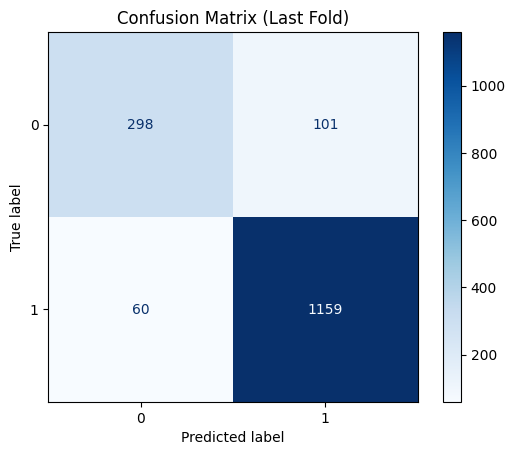

{'Testing Accuracy': {'mean±sd': '0.8965 ± 0.0071', 'range': '[0.8882–0.9067]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9492 ± 0.0054', 'range': '[0.9385–0.9532]'}, 'Specificity': {'mean±sd': '0.7356 ± 0.0216', 'range': '[0.6992–0.7650]'}, 'AUC-ROC': {'mean±sd': '0.9211 ± 0.0034', 'range': '[0.9156–0.9257]'}, 'F1-Score': {'mean±sd': '0.9325 ± 0.0045', 'range': '[0.9268–0.9390]'}}


In [25]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, param_, metrics, y_te5, y_prob5  = evaluate_mlp(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


## catboost

In [29]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_catboost_classifier(X_train, X_test, y_train, y_test, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates CatBoost using Stratified K-Fold cross-validation.
    Handles missing values natively.
    
    Returns:
    - model (CatBoostClassifier): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge the full dataset
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        # Define and train CatBoost model (no imputation needed)
        model = CatBoostClassifier(
            iterations=500,
            learning_rate=0.1,
            depth=6,
            loss_function='Logloss',
            eval_metric='AUC',
            random_seed=42,
            verbose=0,
            # class_weights='Balanced'
        )
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]

        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_X_test = X_te
            last_y_test = y_te
            last_y_pred = y_pred

    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation (CatBoost):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    print("\nPer-fold AUC-ROC values:")
    for i, auc in enumerate(aucs, 1):
        print(f"  Fold {i}: {auc:.4f}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

    # return last_model, metrics  
    return last_model, metrics, y_te, y_prob




# def evaluate_catboost_classifier(
#     X_train, X_test, y_train, y_test,
#     n_splits=5, plot_last_fold=True
# ):
#     # Merge full dataset
#     X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
#     y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     accs, sens, specs, aucs, f1s = [], [], [], [], []
#     last_model, last_params = None, None
#     last_X_test, last_y_test, last_y_pred = None, None, None

#     # CatBoost hyperparameter search space
#     param_grid = {
#         "depth": [4, 6, 8],
#         "learning_rate": [0.03, 0.1, 0.2],
#         "l2_leaf_reg": [1, 3, 5, 7],
#         "iterations": [300, 500, 800],
#         "bagging_temperature": [0.0, 0.5, 1.0],
#         "border_count": [32, 64, 128]
#     }

#     for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
#         print(f"\n=== Fold {fold+1} ===")

#         X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
#         y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

#         # Convert to CatBoost Pool
#         train_pool = Pool(X_tr, y_tr)
#         test_pool = Pool(X_te, y_te)

#         # Base model
#         model = CatBoostClassifier(
#             loss_function="Logloss",
#             eval_metric="AUC",
#             random_seed=42,
#             verbose=False
#         )

#         # Native CatBoost grid search
#         grid_result = model.grid_search(
#             param_grid,
#             train_pool,
#             cv=3,
#             refit=True,  # retrain model on full fold
#             shuffle=True,
#             stratified=True,
#             verbose=False
#         )

#         best_params = grid_result["params"]
#         print("Best parameters:", best_params)

#         # Evaluate on outer fold test split
#         y_pred = model.predict(test_pool)
#         y_prob = model.predict_proba(test_pool)[:, 1]

#         accs.append(accuracy_score(y_te, y_pred))
#         sens.append(recall_score(y_te, y_pred, pos_label=1))
#         specs.append(recall_score(y_te, y_pred, pos_label=0))
#         aucs.append(roc_auc_score(y_te, y_prob))
#         f1s.append(f1_score(y_te, y_pred))

#         if fold == n_splits - 1:
#             last_model = model
#             last_params = best_params
#             last_X_test = X_te
#             last_y_test = y_te
#             last_y_pred = y_pred

#     # Summary formatter
#     def summarise(values):
#         return {
#             "mean±sd": f"{np.mean(values):.4f} ± {np.std(values):.4f}",
#             "range": f"[{np.min(values):.4f}–{np.max(values):.4f}]"
#         }

#     metrics = {
#         "Testing Accuracy": summarise(accs),
#         "Sensitivity (Recall)": summarise(sens),
#         "Specificity": summarise(specs),
#         "AUC-ROC": summarise(aucs),
#         "F1-Score": summarise(f1s)
#     }

#     print("\n=== Final tuned parameters from last fold ===")
#     print(last_params)

#     print(f"\n{n_splits}-Fold Cross-Validation Summary (CatBoost):")
#     for k, v in metrics.items():
#         print(f"{k}: {v['mean±sd']} {v['range']}")

#     if plot_last_fold:
#         cm = confusion_matrix(last_y_test, last_y_pred)
#         disp = ConfusionMatrixDisplay(
#             confusion_matrix=cm,
#             display_labels=last_model.classes_
#         )
#         disp.plot(cmap=plt.cm.Blues)
#         plt.title("Confusion Matrix (Last Fold)")
#         plt.show()

#     return last_model, last_params, metrics



5-Fold Cross-Validation (CatBoost):
Testing Accuracy: 0.9278 ± 0.0026 [0.9234–0.9314]
Sensitivity (Recall): 0.9741 ± 0.0011 [0.9721–0.9754]
Specificity: 0.7867 ± 0.0137 [0.7644–0.8075]
AUC-ROC: 0.9593 ± 0.0060 [0.9485–0.9654]
F1-Score: 0.9531 ± 0.0016 [0.9504–0.9553]

Per-fold AUC-ROC values:
  Fold 1: 0.9485
  Fold 2: 0.9654
  Fold 3: 0.9597
  Fold 4: 0.9646
  Fold 5: 0.9582


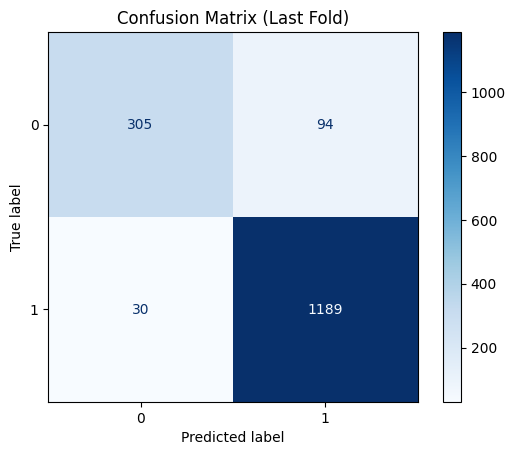

{'Testing Accuracy': {'mean±sd': '0.9278 ± 0.0026', 'range': '[0.9234–0.9314]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9741 ± 0.0011', 'range': '[0.9721–0.9754]'}, 'Specificity': {'mean±sd': '0.7867 ± 0.0137', 'range': '[0.7644–0.8075]'}, 'AUC-ROC': {'mean±sd': '0.9593 ± 0.0060', 'range': '[0.9485–0.9654]'}, 'F1-Score': {'mean±sd': '0.9531 ± 0.0016', 'range': '[0.9504–0.9553]'}}


In [30]:
# imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = clinical_lung_features

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_te6, y_prob6  = evaluate_catboost_classifier(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)

## lightGBM

In [40]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def evaluate_lightgbm_classifier(X_train, X_test, y_train, y_test, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates LightGBM using Stratified K-Fold CV.
    Handles missing values natively.

    Returns:
    - model (LGBMClassifier): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge full dataset
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        # LightGBM model
        model = LGBMClassifier(
            n_estimators=500,
            learning_rate=0.1,
            max_depth=6,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1,
            verbose=-1
        )

        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]

        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_X_test = X_te
            last_y_test = y_te
            last_y_pred = y_pred

    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation (LightGBM):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    print("\nPer-fold AUC-ROC values:")
    for i, auc in enumerate(aucs, 1):
        print(f"  Fold {i}: {auc:.4f}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

    return last_model, metrics, y_te, y_prob

# def evaluate_lightgbm_classifier(
#     X_train, X_test, y_train, y_test,
#     n_splits=5, plot_last_fold=True
# ):
#     """
#     Stratified K-Fold CV with inner grid search for LightGBM.
#     Handles missing values natively.

#     Returns:
#     - last_model: tuned LGBMClassifier from the last outer fold
#     - last_params: best hyperparameters from the last outer fold
#     - metrics: dict with mean±sd and range for each metric
#     """

#     # Merge full dataset
#     X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
#     y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     accs, sens, specs, aucs, f1s = [], [], [], [], []
#     last_model, last_params = None, None
#     last_X_test, last_y_test, last_y_pred = None, None, None

#     # Hyperparameter grid for LightGBM
#     param_grid = {
#         "n_estimators": [200, 500, 800],
#         "learning_rate": [0.01, 0.05, 0.1],
#         "max_depth": [-1, 4, 6, 8],
#         "num_leaves": [15, 31, 63],
#         "subsample": [0.7, 0.9, 1.0],
#         "colsample_bytree": [0.7, 0.9, 1.0],
#         "reg_alpha": [0.0, 0.1, 0.5],
#         "reg_lambda": [0.0, 0.1, 0.5]
#     }

#     for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
#         print(f"\n=== Fold {fold+1} ===")

#         X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
#         y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

#         base_model = LGBMClassifier(
#             objective="binary",
#             class_weight="balanced",
#             random_state=42,
#             n_jobs=-1,
#             verbose=-1
#         )

#         grid = GridSearchCV(
#             estimator=base_model,
#             param_grid=param_grid,
#             scoring="roc_auc",
#             cv=3,
#             n_jobs=-1
#         )
#         grid.fit(X_tr, y_tr)

#         best_model = grid.best_estimator_
#         best_params = grid.best_params_
#         print("Best parameters:", best_params)

#         y_pred = best_model.predict(X_te)
#         y_prob = best_model.predict_proba(X_te)[:, 1]

#         accs.append(accuracy_score(y_te, y_pred))
#         sens.append(recall_score(y_te, y_pred, pos_label=1))
#         specs.append(recall_score(y_te, y_pred, pos_label=0))
#         aucs.append(roc_auc_score(y_te, y_prob))
#         f1s.append(f1_score(y_te, y_pred))

#         if fold == n_splits - 1:
#             last_model = best_model
#             last_params = best_params
#             last_X_test = X_te
#             last_y_test = y_te
#             last_y_pred = y_pred

#     def summarise(vals):
#         return {
#             "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
#             "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
#         }

#     metrics = {
#         "Testing Accuracy": summarise(accs),
#         "Sensitivity (Recall)": summarise(sens),
#         "Specificity": summarise(specs),
#         "AUC-ROC": summarise(aucs),
#         "F1-Score": summarise(f1s)
#     }

#     print("\n=== Final tuned parameters from last fold ===")
#     print(last_params)

#     print(f"\n{n_splits}-Fold Cross-Validation Summary (LightGBM):")
#     for k, v in metrics.items():
#         print(f"{k}: {v['mean±sd']} {v['range']}")

#     print("\nPer-fold AUC-ROC values:")
#     for i, auc in enumerate(aucs, 1):
#         print(f"  Fold {i}: {auc:.4f}")

#     if plot_last_fold:
#         cm = confusion_matrix(last_y_test, last_y_pred)
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
#         disp.plot(cmap=plt.cm.Blues)
#         plt.title("Confusion Matrix (Last Fold)")
#         plt.show()

#     # return last_model, last_params, metrics
#     return last_model, last_params, metrics, y_te, y_prob





5-Fold Cross-Validation (LightGBM):
Testing Accuracy: 0.9256 ± 0.0025 [0.9216–0.9296]
Sensitivity (Recall): 0.9629 ± 0.0032 [0.9582–0.9680]
Specificity: 0.8117 ± 0.0090 [0.7970–0.8250]
AUC-ROC: 0.9522 ± 0.0053 [0.9428–0.9570]
F1-Score: 0.9512 ± 0.0017 [0.9485–0.9537]

Per-fold AUC-ROC values:
  Fold 1: 0.9428
  Fold 2: 0.9570
  Fold 3: 0.9553
  Fold 4: 0.9498
  Fold 5: 0.9561


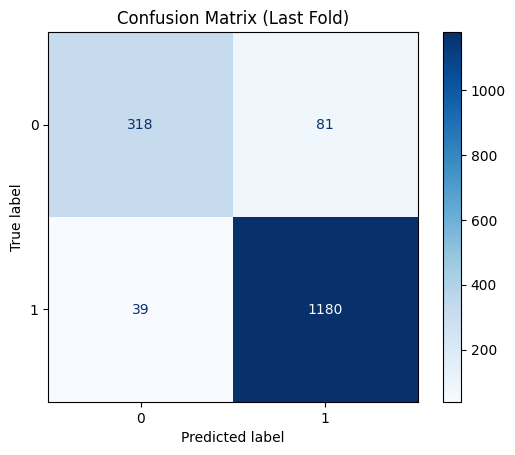

{'Testing Accuracy': {'mean±sd': '0.9256 ± 0.0025', 'range': '[0.9216–0.9296]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9629 ± 0.0032', 'range': '[0.9582–0.9680]'}, 'Specificity': {'mean±sd': '0.8117 ± 0.0090', 'range': '[0.7970–0.8250]'}, 'AUC-ROC': {'mean±sd': '0.9522 ± 0.0053', 'range': '[0.9428–0.9570]'}, 'F1-Score': {'mean±sd': '0.9512 ± 0.0017', 'range': '[0.9485–0.9537]'}}


In [42]:

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = clinical_lung_features

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_te7, y_prob7  = evaluate_lightgbm_classifier(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


## xgb

In [11]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from xgboost import to_graphviz
from graphviz import Source
from xgboost import plot_tree

def evaluate_xgboost_classifier(X_train, X_test, y_train, y_test, n_splits=5, plot_last_fold=True):
    """
    Merges train/test splits and evaluates XGBoost using Stratified K-Fold cross-validation.
    Handles missing values natively.

    Returns:
    - model (XGBClassifier): Model trained on the last CV fold
    - metrics (dict): Mean ± SD and range of metrics across folds
    """

    # Merge input data
    X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
    y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    accs, sens, specs, aucs, f1s = [], [], [], [], []
    last_model, last_X_test, last_y_test, last_y_pred = None, None, None, None

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
        X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
        y_tr, y_te = y_full.iloc[train_idx], y_full.iloc[test_idx]

        y_tr = y_tr.squeeze()
        y_te = y_te.squeeze()

        model = XGBClassifier(
            n_estimators=500,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=1.0,
            scale_pos_weight=None,  # set manually if needed
            use_label_encoder=False,
            eval_metric='logloss',
            tree_method='hist',  # faster on large data
            random_state=42,
            n_jobs=-1
        )

        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)[:, 1]

        accs.append(accuracy_score(y_te, y_pred))
        sens.append(recall_score(y_te, y_pred, pos_label=1))
        specs.append(recall_score(y_te, y_pred, pos_label=0))
        aucs.append(roc_auc_score(y_te, y_prob))
        f1s.append(f1_score(y_te, y_pred))

        if fold == n_splits - 1:
            last_model = model
            last_X_test = X_te
            last_y_test = y_te
            last_y_pred = y_pred

    def summarise(vals):
        return {
            "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
            "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
        }

    metrics = {
        'Testing Accuracy': summarise(accs),
        'Sensitivity (Recall)': summarise(sens),
        'Specificity': summarise(specs),
        'AUC-ROC': summarise(aucs),
        'F1-Score': summarise(f1s)
    }

    print(f"\n{n_splits}-Fold Cross-Validation (XGBoost):")
    for k, v in metrics.items():
        print(f"{k}: {v['mean±sd']} {v['range']}")

    print("\nPer-fold AUC-ROC values:")
    for i, auc in enumerate(aucs, 1):
        print(f"  Fold {i}: {auc:.4f}")

    if plot_last_fold:
        cm = confusion_matrix(last_y_test, last_y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix (Last Fold)')
        plt.show()

        # Optional: plot feature importance
        plt.figure(figsize=(20, 10))
        plot_importance(last_model, max_num_features=20)
        plt.title("Top 20 Feature Importances (Last Fold)")
        plt.show()
    
    # Compute SHAP values
    explainer = shap.Explainer(last_model, last_X_test)
    shap_values = explainer(last_X_test)

    # Summary plot
    shap.summary_plot(shap_values, last_X_test, plot_type="bar", show=True)

    # Optional: full summary plot (beeswarm)
    shap.summary_plot(shap_values, last_X_test, show=True)
    shap.plots.waterfall(shap_values[0])

    # Extract the booster

    from xgboost import plot_tree
    
    # Plot the first tree (num_trees=0)
    fig, ax = plt.subplots(figsize=(50, 40))  # adjust size as needed
    plot_tree(last_model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
    plt.show()
    plt.savefig("xgb_tree_full.png", dpi=200, bbox_inches='tight')

    print("Saved XGBoost tree image as xgb_tree.png")
    from xgboost import to_graphviz

    dot = to_graphviz(last_model, num_trees=0, rankdir='LR')  
    # dot.node_attr.update(fontsize='28')   # node text
    # dot.edge_attr.update(fontsize='24')   # edge labels (yes/no)
    # dot.graph_attr.update(fontsize='28')  # graph-level font
    dot.render("xgb_tree_horizontal", format='png', cleanup=True)


    model_path_json = "xgboost_model.json"
    model_path_pkl = "xgboost_model.pkl"

    last_model.save_model(model_path_json)
    print(f"Model saved as {model_path_json}")

    import joblib
    joblib.dump(last_model, model_path_pkl)
    print(f"Model saved as {model_path_pkl}")

    # return last_model, metrics
    # return last_model, last_params, metrics, y_te, y_prob
    return last_model, metrics, y_te, y_prob




# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.metrics import (
#     accuracy_score, recall_score, roc_auc_score, f1_score,
#     confusion_matrix, ConfusionMatrixDisplay
# )
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt


# def evaluate_xgboost_classifier(
#     X_train, X_test, y_train, y_test,
#     n_splits=5, plot_last_fold=True
# ):
#     """
#     Performs stratified K-fold cross-validation with an inner grid search
#     to tune XGBoost hyperparameters.
    
#     Returns:
#     - last_model: final tuned XGBoost model from the last fold
#     - last_params: best hyperparameters from last fold
#     - metrics: dict with summary statistics for all CV folds
#     """

#     # Merge full dataset
#     X_full = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
#     y_full = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#     accs, sens, specs, aucs, f1s = [], [], [], [], []
#     last_model, last_params = None, None
#     last_y_test, last_y_pred = None, None

#     # Parameter grid for tuning
#     param_grid = {
#         "n_estimators": [200, 500, 800],
#         "max_depth": [4, 6, 8],
#         "learning_rate": [0.01, 0.05, 0.1],
#         "subsample": [0.7, 0.8, 0.9, 1.0],
#         "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
#         "gamma": [0, 1, 5],
#         "reg_alpha": [0.0, 0.1, 0.5],
#         "reg_lambda": [0.1, 0.5, 1.0],
#     }

#     for fold, (train_idx, test_idx) in enumerate(skf.split(X_full, y_full)):
#         print(f"\n=== Fold {fold+1} ===")

#         X_tr, X_te = X_full.iloc[train_idx], X_full.iloc[test_idx]
#         y_tr, y_te = y_full.iloc[train_idx].squeeze(), y_full.iloc[test_idx].squeeze()

#         base_model = XGBClassifier(
#             objective="binary:logistic",
#             eval_metric="logloss",
#             tree_method="hist",
#             use_label_encoder=False,
#             random_state=42,
#             n_jobs=-1
#         )

#         grid = GridSearchCV(
#             estimator=base_model,
#             param_grid=param_grid,
#             scoring="roc_auc",
#             cv=3,
#             n_jobs=-1,
#         )
#         grid.fit(X_tr, y_tr)

#         best_model = grid.best_estimator_
#         best_params = grid.best_params_
#         print("Best parameters:", best_params)

#         y_pred = best_model.predict(X_te)
#         y_prob = best_model.predict_proba(X_te)[:, 1]

#         accs.append(accuracy_score(y_te, y_pred))
#         sens.append(recall_score(y_te, y_pred, pos_label=1))
#         specs.append(recall_score(y_te, y_pred, pos_label=0))
#         aucs.append(roc_auc_score(y_te, y_prob))
#         f1s.append(f1_score(y_te, y_pred))

#         if fold == n_splits - 1:
#             last_model = best_model
#             last_params = best_params
#             last_y_test = y_te
#             last_y_pred = y_pred

#     # Summary helper
#     def summarise(vals):
#         return {
#             "mean±sd": f"{np.mean(vals):.4f} ± {np.std(vals):.4f}",
#             "range": f"[{np.min(vals):.4f}–{np.max(vals):.4f}]"
#         }

#     metrics = {
#         "Testing Accuracy": summarise(accs),
#         "Sensitivity (Recall)": summarise(sens),
#         "Specificity": summarise(specs),
#         "AUC-ROC": summarise(aucs),
#         "F1-Score": summarise(f1s)
#     }

#     print("\n=== Final tuned parameters (last fold) ===")
#     print(last_params)

#     print(f"\n{n_splits}-Fold CV Summary (XGBoost):")
#     for k, v in metrics.items():
#         print(f"{k}: {v['mean±sd']}  {v['range']}")

#     print("\nPer-fold AUC values:")
#     for i, auc in enumerate(aucs, 1):
#         print(f"  Fold {i}: {auc:.4f}")

#     if plot_last_fold:
#         cm = confusion_matrix(last_y_test, last_y_pred)
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
#         disp.plot(cmap=plt.cm.Blues)
#         plt.title("Confusion Matrix (Last Fold)")
#         plt.show()

#     return last_model, last_params, metrics


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:01:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:01:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:01:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt


5-Fold Cross-Validation (XGBoost):
Testing Accuracy: 0.9275 ± 0.0032 [0.9227–0.9321]
Sensitivity (Recall): 0.9723 ± 0.0014 [0.9697–0.9737]
Specificity: 0.7907 ± 0.0141 [0.7669–0.8100]
AUC-ROC: 0.9582 ± 0.0049 [0.9502–0.9638]
F1-Score: 0.9528 ± 0.0020 [0.9500–0.9556]

Per-fold AUC-ROC values:
  Fold 1: 0.9502
  Fold 2: 0.9638
  Fold 3: 0.9572
  Fold 4: 0.9629
  Fold 5: 0.9571


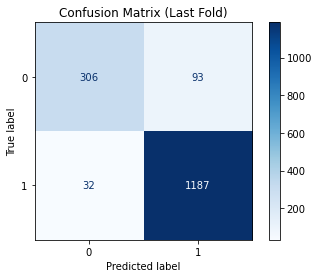

<Figure size 1440x720 with 0 Axes>

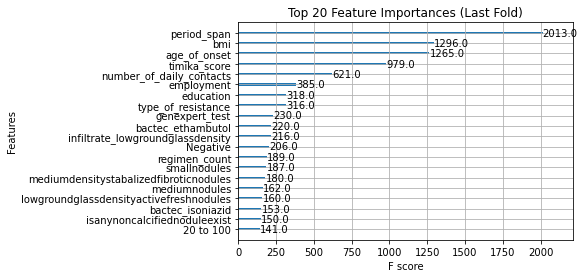

 99%|===================| 1600/1618 [00:41<00:00]        

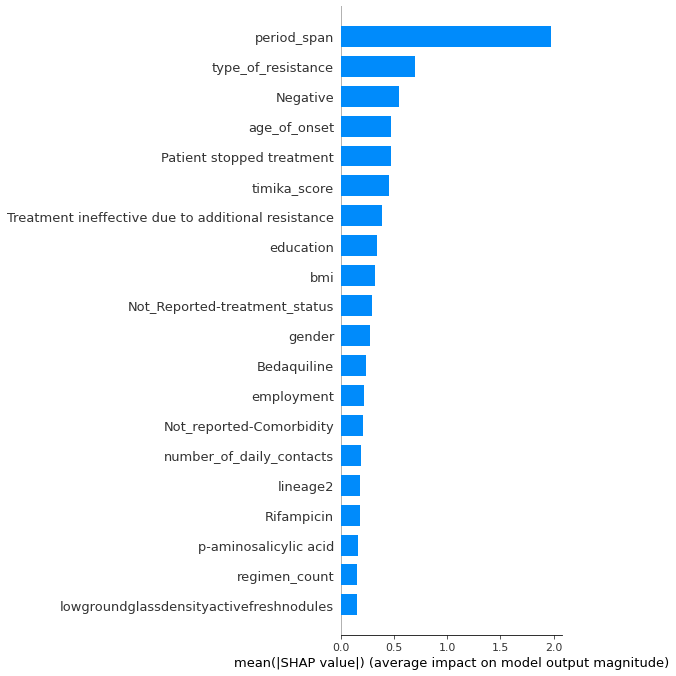

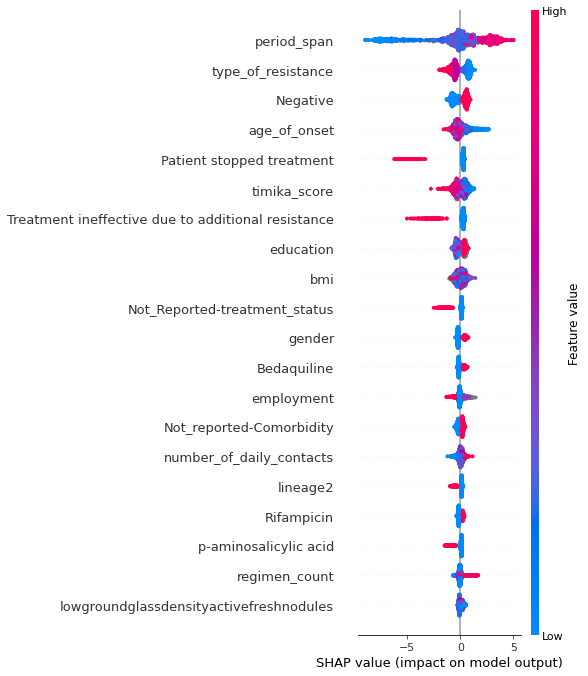

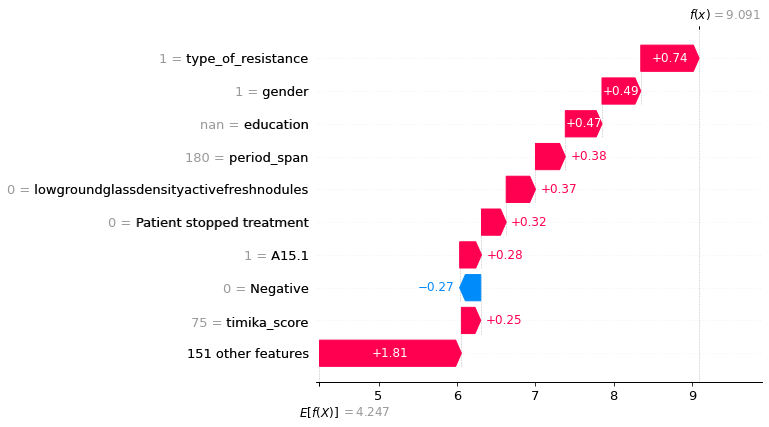

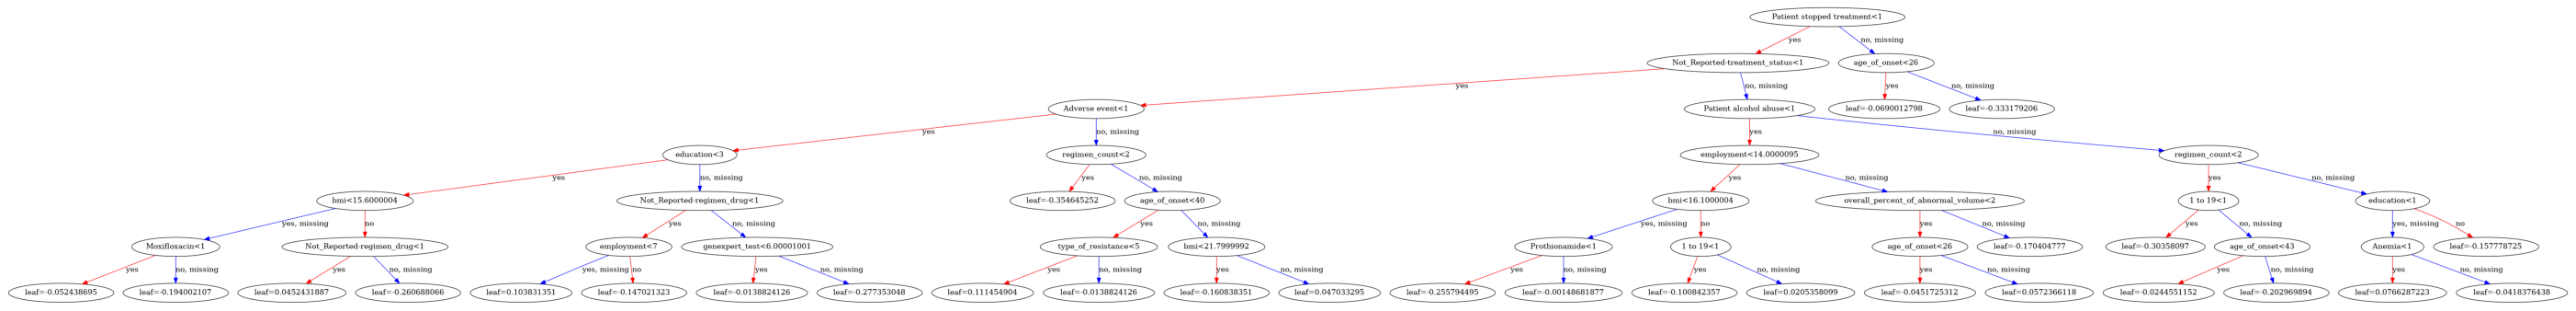

Saved XGBoost tree image as xgb_tree.png
Model saved as xgboost_model.json
Model saved as xgboost_model.pkl
{'Testing Accuracy': {'mean±sd': '0.9275 ± 0.0032', 'range': '[0.9227–0.9321]'}, 'Sensitivity (Recall)': {'mean±sd': '0.9723 ± 0.0014', 'range': '[0.9697–0.9737]'}, 'Specificity': {'mean±sd': '0.7907 ± 0.0141', 'range': '[0.7669–0.8100]'}, 'AUC-ROC': {'mean±sd': '0.9582 ± 0.0049', 'range': '[0.9502–0.9638]'}, 'F1-Score': {'mean±sd': '0.9528 ± 0.0020', 'range': '[0.9500–0.9556]'}}


<Figure size 432x288 with 0 Axes>

In [12]:

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = clinical_lung_features
# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics, y_te8, y_prob8  = evaluate_xgboost_classifier(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)

In [15]:
X_train_resampled_head = X_train_resampled.head(20)

In [19]:
X_train_resampled_head.to_csv('example_input.csv')

In [18]:
import joblib

feature_list = list(X_train_resampled_head.columns)
joblib.dump(feature_list, "feature_list.pkl")

print("Saved feature_list.pkl with", len(feature_list), "features.")

Saved feature_list.pkl with 160 features.


## delong test

In [117]:
import numpy as np
from scipy.stats import norm

# =====================================================================
# Helper functions (DeLong implementation)
# Source: https://github.com/yandexdataschool/roc_comparison
# =====================================================================
import numpy as np
from scipy.stats import norm


def compute_midrank(x):
    sorted_idx = np.argsort(x)
    ranks = np.zeros(len(x), dtype=float)
    i = 0
    while i < len(x):
        j = i
        while j < len(x) and x[sorted_idx[j]] == x[sorted_idx[i]]:
            j += 1
        ranks[sorted_idx[i:j]] = 0.5 * (i + j - 1)
        i = j
    return ranks

def fast_delong(predictions_sorted_transposed, label_1_count):
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m

    tx = predictions_sorted_transposed[:, :m]
    ty = predictions_sorted_transposed[:, m:]

    v10 = np.array([compute_midrank(x) for x in tx])
    v01 = np.array([compute_midrank(x) for x in ty])

    aucs = (v10.mean(axis=1) - v01.mean(axis=1)) / (m * n)

    sx = v10.var(axis=1, ddof=1) / m
    sy = v01.var(axis=1, ddof=1) / n

    return aucs, sx + sy

def delong_roc_variance(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    pos = y_pred[y_true == 1]
    neg = y_pred[y_true == 0]

    # Sort scores descending
    order = np.argsort(-y_pred)
    y_true_sorted = y_true[order]
    y_pred_sorted = y_pred[order]

    label_1_count = int(y_true.sum())
    preds = np.expand_dims(y_pred_sorted, axis=0)
    
    print("Before sortingTrue:", y_true[:10])
    print("After sortingTrue:", y_true_sorted[:10])
    
    print("Before sorting:", y_pred[:10])
    print("After sorting:", y_pred_sorted[:10])
    
    aucs, vars = fast_delong(preds, label_1_count)
    return aucs[0], vars[0]

def delong_test(y_true, pred1, pred2):
    auc1, var1 = delong_roc_variance(y_true, pred1)
    auc2, var2 = delong_roc_variance(y_true, pred2)

    se = np.sqrt(var1 + var2)
    z = (auc1 - auc2) / se
    p = 2 * norm.sf(abs(z))
    return auc1, auc2, p


# =====================================================================
# Now compare all models
# =====================================================================

# Put your predicted probabilities here
models = {
    "Model1": y_prob1,
    "Model2": y_prob2,
    "Model3": y_prob3,
    "Model4": y_prob4,
    "Model5": y_prob5,
    "Model6": y_prob6,
    "Model7": y_prob7,
    "Model8": y_prob8,
}
for key in models:
    models[key] = np.asarray(models[key], dtype=float).reshape(-1)

y_true = y_te2.squeeze()   # should be 0/1 labels
y_true = np.asarray(y_true, dtype=int).reshape(-1)

model_names = list(models.keys())
n = len(model_names)

print("\n### Pairwise DeLong Test for AUC Comparison ###\n")

for i in range(n):
    for j in range(i + 1, n):
        print(i, j)
        if i == j:
            print('i == j' , i, j)
        name1, name2 = model_names[i], model_names[j]
        # print(models[name1], '----', models[name2])

        auc1, auc2, p = delong_test(y_true, models[name1], models[name2])
        print(f"{name1} vs {name2}: AUC1={auc1:.4f}, AUC2={auc2:.4f}, p-value={p:.6f}")
        break
    break



### Pairwise DeLong Test for AUC Comparison ###

0 1
Before sortingTrue: [1 0 1 1 1 1 1 1 0 1]
After sortingTrue: [1 1 1 0 1 1 1 1 1 1]
Before sorting: [0.91453334 0.00119397 0.94895399 0.79385657 0.95035748 0.89727233
 0.59017323 0.97818261 0.28145456 0.89081853]
After sorting: [0.99853311 0.99733825 0.99592213 0.99544684 0.99526122 0.99510671
 0.99442829 0.99404115 0.99367288 0.99329512]
Before sortingTrue: [1 0 1 1 1 1 1 1 0 1]
After sortingTrue: [0 1 1 0 1 1 1 1 1 1]
Before sorting: [9.99999089e-001 6.28573565e-121 9.99736429e-001 9.84303945e-001
 1.78193336e-002 9.99984906e-001 2.94254128e-016 9.99999899e-001
 6.56851803e-035 9.99949459e-001]
After sorting: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Model1 vs Model2: AUC1=0.0008, AUC2=0.0008, p-value=1.000000


In [120]:
!pwd

/mnt/storageG1/lwang/Projects/TBpt/Analysis


In [119]:
import pandas as pd

# put all variables into a dictionary
data = {
    "y_prob1": y_prob1,
    "y_prob2": y_prob2,
    "y_prob3": y_prob3,
    "y_prob4": y_prob4,
    "y_prob5": y_prob5,
    "y_prob6": y_prob6,
    "y_prob7": y_prob7,
    "y_prob8": y_prob8,
    "y_te2": y_te2
}

# create dataframe
df = pd.DataFrame(data)

# save to csv
df.to_csv("./probs_output.csv", index=False)


In [103]:
for name in models:
    print(
        name,
        roc_auc_score(y_true.to_numpy(), np.array(models[name]))
    )


Model1 0.9156217039728115
Model2 0.7919398578480656
Model3 0.9190038262185407
Model4 0.8556995441844972
Model5 0.9256652706417396
Model6 0.9581891562375997
Model7 0.9560961468478415
Model8 0.9558021386526201


In [114]:
from scipy import stats
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy.stats import norm

# ----- DeLong Implementation -----

def _compute_midrank(x):
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5 * (i + j - 1) + 1
        i = j
    T2 = np.empty(N, dtype=float)
    T2[J] = T
    return T2

def _fast_delong(predictions_sorted_transposed, label_1_count):
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m

    positive_predictions = predictions_sorted_transposed[:, :m]
    negative_predictions = predictions_sorted_transposed[:, m:]

    k = predictions_sorted_transposed.shape[0]

    tx = np.empty((k, m))
    ty = np.empty((k, n))

    for r in range(k):
        tx[r] = _compute_midrank(positive_predictions[r])
        ty[r] = _compute_midrank(negative_predictions[r])

    aucs = (tx.mean(axis=1) - ty.mean(axis=1)) / n

    v01 = (tx - tx.mean(axis=1, keepdims=True)) / n
    v10 = (ty - ty.mean(axis=1, keepdims=True)) / n

    sx = np.cov(v01)
    sy = np.cov(v10)

    s = sx + sy
    return aucs, s

def delong_roc_test(y_true, y_pred1, y_pred2):
    y_true = np.array(y_true)
    pos = y_true == 1
    neg = y_true == 0
    
    # preds = np.vstack([
    #     y_pred1, 
    #     y_pred2
    # ])
    preds = np.vstack([
    y_pred1.astype(float),
    y_pred2.astype(float)
    ])


    order = np.argsort(-preds[0])
    preds = preds[:, order]
    y_true = y_true[order]

    label_1_count = pos.sum()
    aucs, cov = _fast_delong(preds, label_1_count)

    auc1, auc2 = aucs
    diff = auc1 - auc2

    var = cov[0, 0] + cov[1, 1] - 2 * cov[0, 1]
    z = diff / np.sqrt(var)
    p = 2 * (1 - norm.cdf(abs(z)))

    return auc1, auc2, diff, p

for m1 in range(1, 9):
    for m2 in range(m1+1, 9):
        p = delong_roc_test(
            y_true,
            np.array(models[f"Model{m1}"]),
            np.array(models[f"Model{m2}"])
        )
        print(f"Model{m1} vs Model{m2}: p={p}")

Model1 vs Model2: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model1 vs Model3: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model1 vs Model4: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model1 vs Model5: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model1 vs Model6: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model1 vs Model7: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model1 vs Model8: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model2 vs Model3: p=(np.float64(1.0275689223057645), np.float64(1.0275689223057645), np.float64(0.0), np.float64(1.0))
Model2 vs Model4: p=(np.float64(1.02756892230576

In [106]:
models[f"Model{m1}"]

array([9.9992776e-01, 1.3620677e-04, 9.9712247e-01, ..., 9.9824476e-01,
       9.9992096e-01, 9.9875295e-01], dtype=float32)

In [107]:
models[f"Model{m2}"]

array([9.9992776e-01, 1.3620677e-04, 9.9712247e-01, ..., 9.9824476e-01,
       9.9992096e-01, 9.9875295e-01], dtype=float32)

In [111]:
m1

8

In [110]:
m2

8

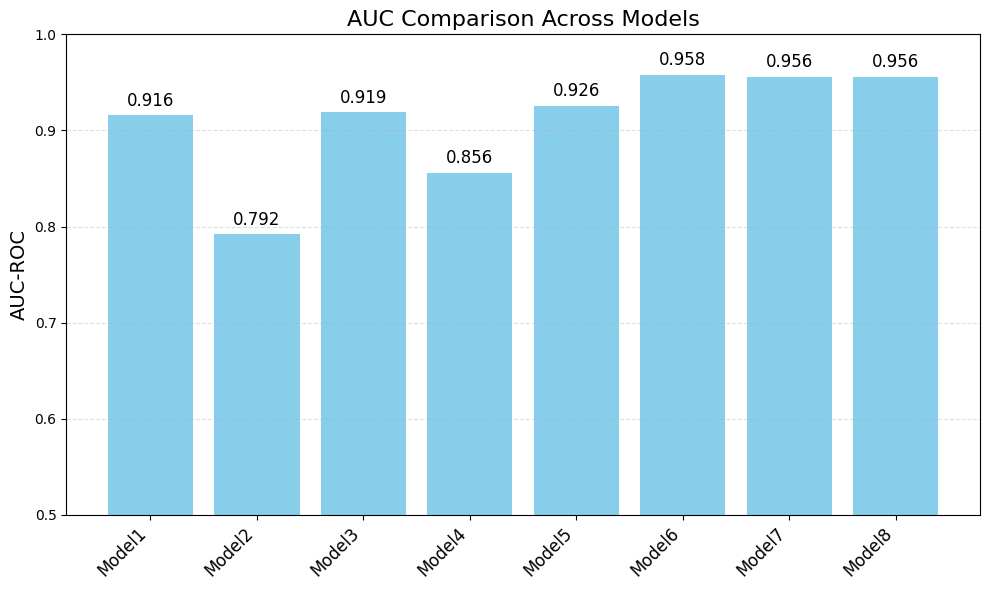

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# ----------------------------------------------------
# 1. Compute AUCs for each model
# ----------------------------------------------------

aucs = {
    "Model1": roc_auc_score(y_te2, y_prob1),
    "Model2": roc_auc_score(y_te2, y_prob2),
    "Model3": roc_auc_score(y_te2, y_prob3),
    "Model4": roc_auc_score(y_te2, y_prob4),
    "Model5": roc_auc_score(y_te2, y_prob5),
    "Model6": roc_auc_score(y_te2, y_prob6),
    "Model7": roc_auc_score(y_te2, y_prob7),
    "Model8": roc_auc_score(y_te2, y_prob8),
}

# ----------------------------------------------------
# 2. Create a bar plot
# ----------------------------------------------------

plt.figure(figsize=(10, 6))
plt.bar(aucs.keys(), aucs.values(), color="skyblue")

plt.title("AUC Comparison Across Models", fontsize=16)
plt.ylabel("AUC-ROC", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Annotate bars
for i, (name, auc) in enumerate(aucs.items()):
    plt.text(i, auc + 0.01, f"{auc:.3f}", ha="center", fontsize=12)

plt.tight_layout()
plt.show()


In [92]:
import numpy as np
import scipy.stats
from sklearn.metrics import roc_auc_score

# =============================================================================
# --- CORE DELONG TEST ALGORITHM UTILITIES (Internal Helpers)
# =============================================================================

def _compute_midrank(x):
    """Computes midranks for the DeLong algorithm."""
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=np.float64)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5 * (i + j - 1)
        i = j
    
    T2 = np.empty(N, dtype=np.float64)
    T2[J] = T + 1
    return T2

def _compute_ground_truth_statistics(ground_truth):
    """Prepares data by sorting by ground truth."""
    if not np.array_equal(np.unique(ground_truth), [0, 1]):
        raise ValueError("Ground truth must contain only 0 and 1.")
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    return order, label_1_count

def _fastDeLong(predictions_sorted_transposed, label_1_count):
    """Fast DeLong test computation, returning AUCs and covariance matrix."""
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    
    if m == 0 or n == 0:
        raise ValueError("Cannot perform DeLong test: One class has zero samples.")
    
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]
    
    tx = np.empty([k, m], dtype=np.float64)
    ty = np.empty([k, n], dtype=np.float64)
    tz = np.empty([k, m + n], dtype=np.float64)
    
    for r in range(k):
        tx[r, :] = _compute_midrank(positive_examples[r, :])
        ty[r, :] = _compute_midrank(negative_examples[r, :])
        tz[r, :] = _compute_midrank(predictions_sorted_transposed[r, :])
        
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    
    return aucs, delongcov

def _calc_pvalue(aucs, sigma):
    """Calculates the two-sided p-value from AUCs and covariance matrix."""
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    # We use sf (Survival Function) to get 1 - CDF, which is equivalent to 
    # calculating the area in the tail, then multiply by 2 for two-sided test.
    p_value = 2.0 * scipy.stats.norm.sf(z, loc=0, scale=1)
    return p_value[0][0]

# =============================================================================
# --- PUBLIC FACING FUNCTION (The core function you requested)
# =============================================================================

def delong_roc_test(ground_truth, predictions_one, predictions_two):
    """
    Performs the DeLong test to compare the AUCs of two correlated ROC curves.
    
    The null hypothesis (H0) is that the two AUCs are equal.
    
    Args:
        ground_truth (array-like): True binary labels (0 or 1).
        predictions_one (array-like): Predicted probabilities for the first model.
        predictions_two (array-like): Predicted probabilities for the second model.
        
    Returns:
        tuple: (p_value, auc_one, auc_two)
               - p_value (float): Two-sided p-value from the DeLong test.
               - auc_one (float): Area Under the Curve for model one.
               - auc_two (float): Area Under the Curve for model two.
    """
    # Ensure inputs are numpy arrays
    gt_np = np.array(ground_truth)
    preds_a_np = np.array(predictions_one)
    preds_b_np = np.array(predictions_two)
    
    # 1. Calculate AUCs (using sklearn for simplicity/verification)
    auc_one = roc_auc_score(gt_np, preds_a_np)
    auc_two = roc_auc_score(gt_np, preds_b_np)
    
    # 2. Prepare data for DeLong calculation
    order, label_1_count = _compute_ground_truth_statistics(gt_np)
    
    # Stack predictions and sort them according to the ground truth order
    predictions_sorted_transposed = np.vstack((preds_a_np, preds_b_np))[:, order]
    
    # 3. Compute AUCs and DeLong covariance matrix
    # The fastDeLong returns the AUCs based on midranks, which will closely match
    # the roc_auc_score if no ties are present. We rely on the returned covariance.
    aucs_check, delongcov = _fastDeLong(predictions_sorted_transposed, label_1_count)
    
    # 4. Calculate the p-value
    p_value = _calc_pvalue(aucs_check, delongcov)
    
    return p_value, auc_one, auc_two

# =============================================================================
# --- Example Usage ---
# =============================================================================

if __name__ == '__main__':
    print("--- DeLong Test for Two Models ---")
    
    # Example Data: 
    # Model A: Good performance
    # Model B: Average performance
    
    N_samples = 100
    np.random.seed(42) # for reproducibility
    y_true = np.random.randint(0, 2, size=N_samples)
    
    # Model 1 (Better Model)
    # Higher signal, lower noise leads to better AUC
    prob_A = np.clip(y_true * 0.9 + np.random.rand(N_samples) * 0.15, 0.05, 0.95)
    
    # Model 2 (Worse Model)
    prob_B = np.clip(y_true * 0.7 + np.random.rand(N_samples) * 0.3, 0.05, 0.95)
    
    # Run the test
    p_value, auc_A, auc_B = delong_roc_test(y_true, prob_A, prob_B)
    
    # Report Results
    print(f"\nModel A AUC: {auc_A:.4f}")
    print(f"Model B AUC: {auc_B:.4f}")
    
    print("\nStatistical Comparison:")
    print(f"P-value: {p_value:.4e}")
    
    alpha = 0.05
    if p_value < alpha:
        winner = "Model A" if auc_A > auc_B else "Model B"
        print(f"\nConclusion (p < {alpha}): The difference is statistically significant.")
        print(f"The best performing model is: {winner}")
    else:
        print(f"\nConclusion (p >= {alpha}): The difference is NOT statistically significant.")
        print("Model A and Model B have equivalent performance.")

--- DeLong Test for Two Models ---

Model A AUC: 1.0000
Model B AUC: 1.0000

Statistical Comparison:
P-value: nan

Conclusion (p >= 0.05): The difference is NOT statistically significant.
Model A and Model B have equivalent performance.


/tmp/ipykernel_116268/691716006.py:69: RuntimeWarning: invalid value encountered in divide
  z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))


In [70]:
y_prob3

array([0.96076673, 0.06877718, 0.96260737, ..., 0.94919584, 0.96543558,
       0.99373534])

In [71]:
y_prob4

array([1.        , 0.        , 0.83271483, ..., 0.94521054, 0.79639744,
       0.94124743])

In [72]:
y_prob5

array([9.99997298e-01, 3.53644197e-14, 9.90844876e-01, ...,
       9.99972615e-01, 9.99999786e-01, 9.99999953e-01])

In [88]:
y_prob8

array([9.9992776e-01, 1.3620677e-04, 9.9712247e-01, ..., 9.9824476e-01,
       9.9992096e-01, 9.9875295e-01], dtype=float32)

In [90]:
y_prob7

array([9.99715652e-01, 2.30063147e-06, 9.90125643e-01, ...,
       9.94419964e-01, 9.99890615e-01, 9.99832593e-01])

In [97]:
for name in models:
    print(
        name,
        roc_auc_score(y_te1, np.array(models[name]))
    )


ValueError: Found input variables with inconsistent numbers of samples: [200, 1618]

## train multiclass

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9257
Testing Accuracy: 0.9086
Sensitivity (Recall) Per Class:
  Class 0: 0.8596
  Class 1: 0.9246


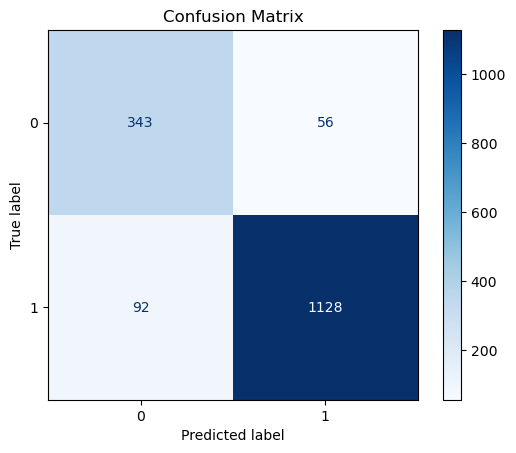

<Figure size 2500x5500 with 0 Axes>

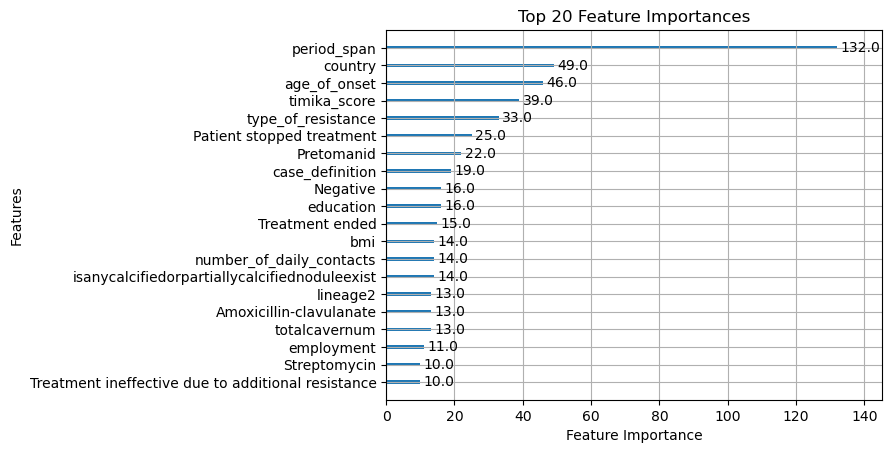

                       Feature  Importance
28                 period_span       132.0
16                     country        49.0
27                age_of_onset        46.0
17                timika_score        39.0
21          type_of_resistance        33.0
..                         ...         ...
2   other_non_tb_abnormalities         1.0
9                 smallnodules         1.0
66                  Ethambutol         1.0
10                 hugenodules         1.0
63              Clarithromycin         1.0

[88 rows x 2 columns]


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
model, metrics = evaluate_xgboost_classifier_multiclass(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

